In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
bc = mcolors.BASE_COLORS
%matplotlib inline

import seaborn as sns
sns.set()

plt.rcdefaults()
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (8,4)

import matplotlib.ticker as ticker


%config InlineBackend.figure_format = 'retina'

In [2]:
def toFixed(numObj, digits=0):
    return f"{numObj:.{digits}f}"

In [3]:
xl = pd.ExcelFile('/Users/artyom/Downloads/Тест Qiwi_аналитик.xlsx')
df = xl.parse('Данные')

In [4]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1036261 entries, 0 to 1036260
Data columns (total 15 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Месяц                  1036261 non-null  datetime64[ns]
 1   Статус транзакци       1036261 non-null  int64         
 2   Мерчант                1036261 non-null  object        
 3   Категория мерчанта     1036261 non-null  object        
 4   Канал                  1036261 non-null  int64         
 5   МПС                    1036261 non-null  object        
 6   Продукт карты          1004071 non-null  object        
 7   Признак карты          1035385 non-null  float64       
 8   Страна карты           1035986 non-null  float64       
 9   Банк rus               975297 non-null   object        
 10  Bank eng               494809 non-null   object        
 11  Оборот                 1035384 non-null  float64       
 12  Количество транзакций  10362

Месяц  Статус транзакци    Мерчант Категория мерчанта  Канал  \
0 2019-01-01                65   Мерчант9         Категория1   1105   
1 2019-01-01                65   Мерчант8         Категория1   1100   
2 2019-01-01                65   Мерчант8         Категория1   1100   
3 2019-01-01                65  Мерчант13         Категория1   1230   
4 2019-01-01                65   Мерчант8         Категория1   1368   

          МПС Продукт карты  Признак карты  Страна карты         Банк rus  \
0  MasterCard         Debit            0.0         643.0       Альфа-банк   
1        VISA         Debit            0.0         643.0              NaN   
2        VISA         Debit            0.0         643.0  Сбербанк России   
3        VISA        Credit            0.0         643.0              NaN   
4  MasterCard         Debit            0.0         643.0  Сбербанк России   

                                            Bank eng     Оборот  \
0                      JOINT STOCK COMPANY ALFA-BANK  38.382353   
1  PUBLIC JOINT-STOCK COMPANY BANK OTKRITIE FINAN...  50.000000   
2                                 SBERBANK OF RUSSIA   4.705882   
3                                      VTB BANK PJSC  83.864706   
4                                 SBERBANK OF RUSSIA  23.823529   

   Количество транзакций  Доход от мерчанта  Расход на МПС  
0               1.000000           0.920354      -1.053097  
1              11.764706           1.203540      -1.353982  
2              11.764706           0.115044      -0.123894  
3              23.529412           0.884956      -0.061947  
4              17.647059           0.575221      -0.575221

In [5]:
df['Количество транзакций'] = round(df['Количество транзакций'])
df['Net Revenue'] = df['Доход от мерчанта'] + df['Расход на МПС']

In [6]:
profit = df.groupby('Месяц')['Доход от мерчанта'].sum()
income = df.groupby('Месяц')['Оборот'].sum()

In [7]:
suc_operations = df[(df['Статус транзакци'] == 65) | (df['Статус транзакци'] == 80)]

In [8]:
suc_profit = suc_operations.groupby('Месяц')['Доход от мерчанта'].sum()
suc_income = suc_operations.groupby('Месяц')['Оборот'].sum()

Оборот по успешным операциям ∼ 180.0 млн.
Оборот по всем операциям ∼ 415.0 млн.


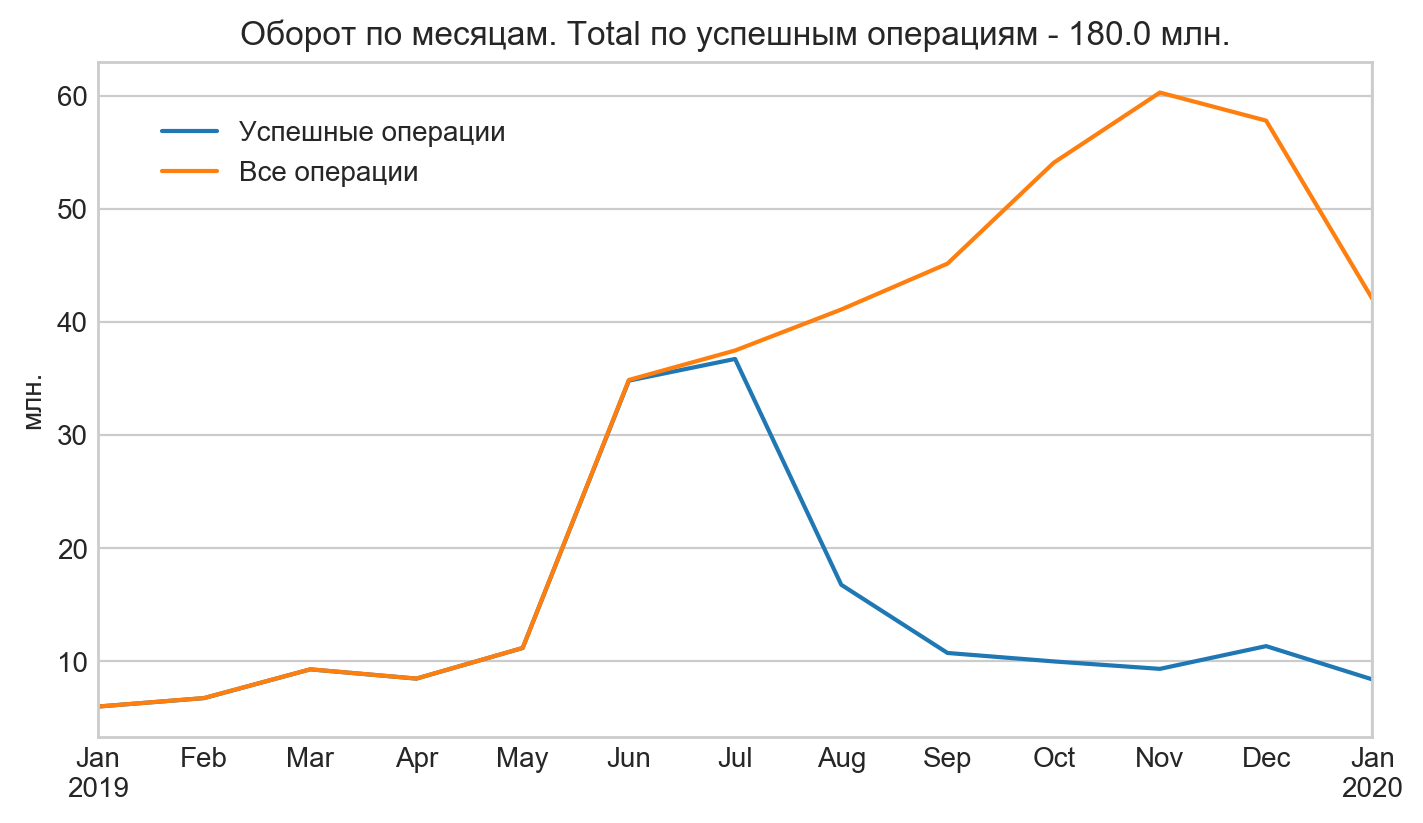

In [9]:
plt.figure(figsize=(7, 4), constrained_layout=True)
suc_income_plot = (suc_income / 1000000).plot()
income_plot = (income / 1000000).plot()
print('Оборот по успешным операциям ∼ {} млн.'.format(round(suc_operations['Оборот'].sum() / 1000000)))
print('Оборот по всем операциям ∼ {} млн.'.format(round(df['Оборот'].sum() / 1000000)))
suc_income_plot.set_title('Оборот по месяцам. Total по успешным операциям - {} млн.'.format(round(suc_operations['Оборот'].sum() / 1000000)))
plt.ylabel('млн.')
plt.xlabel('')
plt.legend(['Успешные операции', 'Все операции'], bbox_to_anchor=(0.34, 0.95), fontsize=10)

Доход по успешным операциям ∼ 2127.0 тыс.
Доход по всем операциям ∼ 3245.0 тыс.


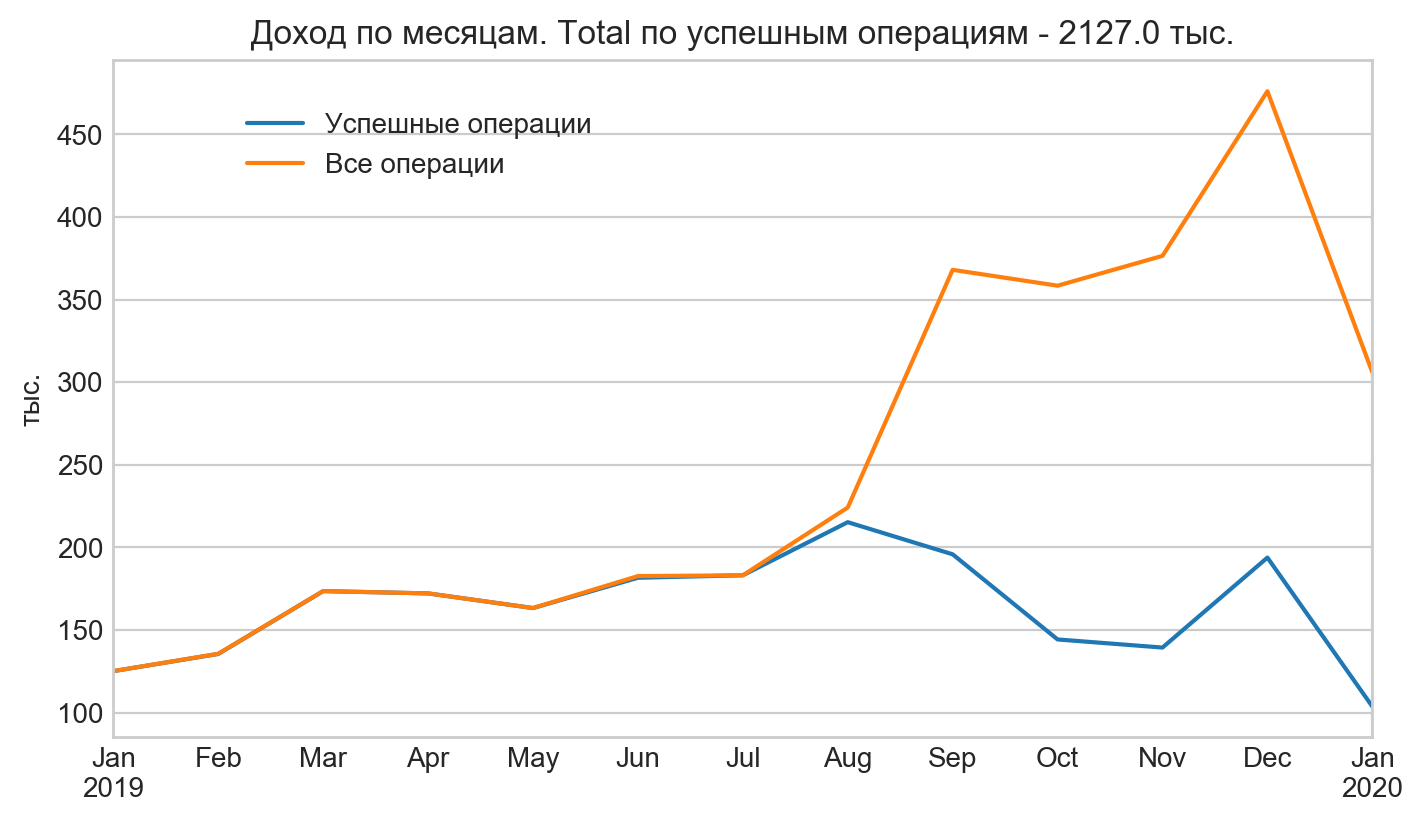

In [10]:
plt.figure(figsize=(7, 4), constrained_layout=True)
suc_profit_plot = (suc_profit / 1000).plot()
profit_plot = (profit / 1000).plot()
print('Доход по успешным операциям ∼ {} тыс.'.format(round(suc_operations['Доход от мерчанта'].sum() / 1000)))
print('Доход по всем операциям ∼ {} тыс.'.format(round(df['Доход от мерчанта'].sum() / 1000)))
suc_profit_plot.set_title('Доход по месяцам. Total по успешным операциям - {} тыс.'.format(round(suc_operations['Доход от мерчанта'].sum() / 1000)))
plt.ylabel('тыс.')
plt.xlabel('')
plt.legend(['Успешные операции', 'Все операции'], bbox_to_anchor=(0.40, 0.96), fontsize=10)

Text(0.5, 0, '')

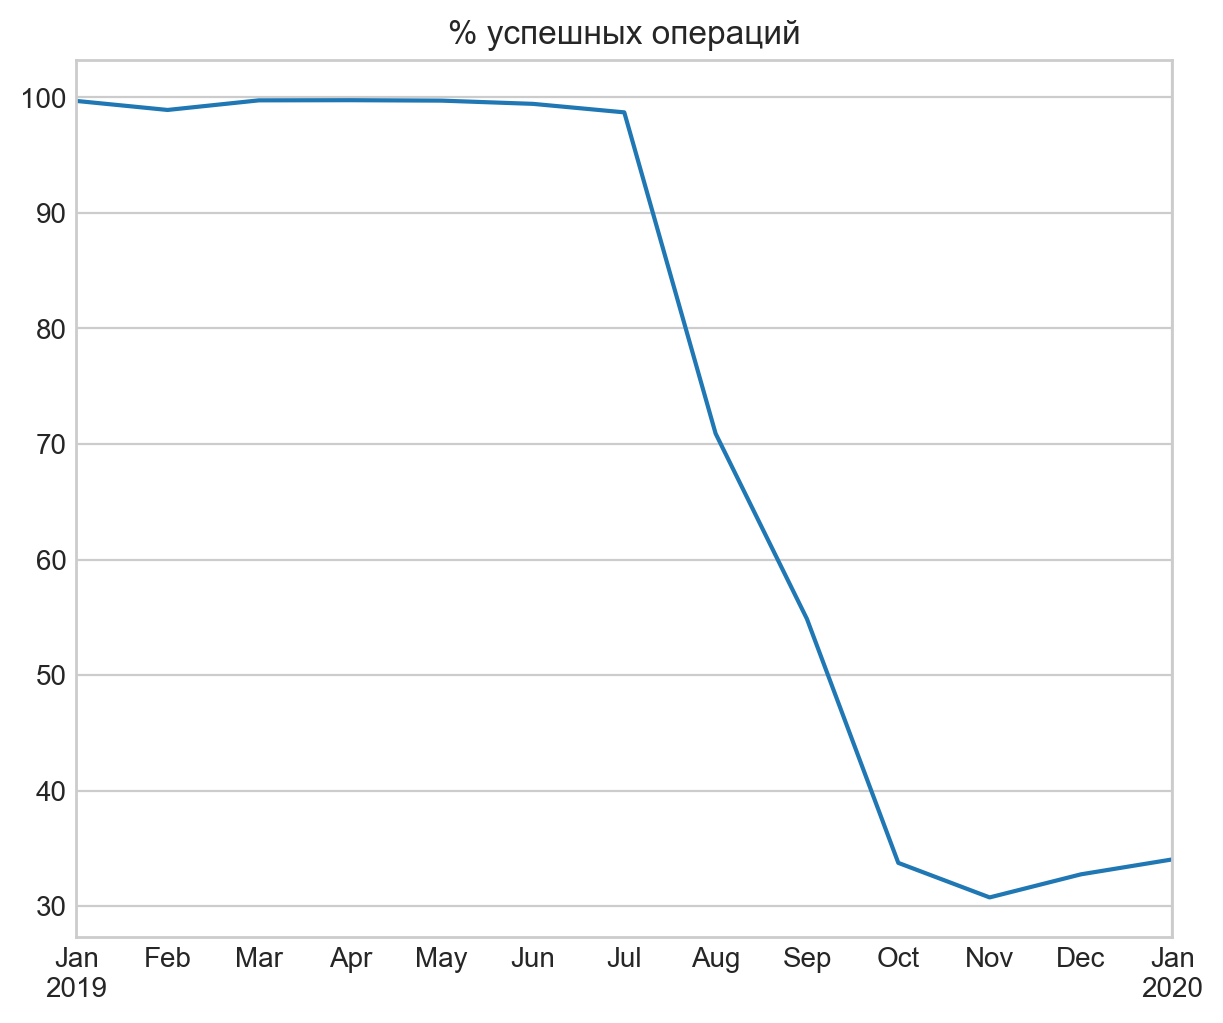

In [11]:
plt.figure(figsize=(6, 5), constrained_layout=True)

suc_amount_oper = suc_operations.groupby('Месяц')['Статус транзакци'].count()
total_operations = df.groupby('Месяц')['Статус транзакци'].count()
succ_trans = ((suc_amount_oper / total_operations) * 100).plot()
succ_trans.set_title('% успешных операций')
plt.xlabel('')

In [12]:
suc_merchunt6 = suc_operations[suc_operations['Мерчант'] == 'Мерчант6']
suc_profit_6 = suc_merchunt6.groupby('Месяц')['Доход от мерчанта'].sum()
suc_income_6 = suc_merchunt6.groupby('Месяц')['Оборот'].sum()

merchunt6 = df[df['Мерчант'] == 'Мерчант6']
profit_6 = merchunt6.groupby('Месяц')['Доход от мерчанта'].sum()
income_6 = merchunt6.groupby('Месяц')['Оборот'].sum()

Оборот по успешным операциям ∼ 65.0 млн.
Оборот по всем операциям ∼ 161.0 млн.


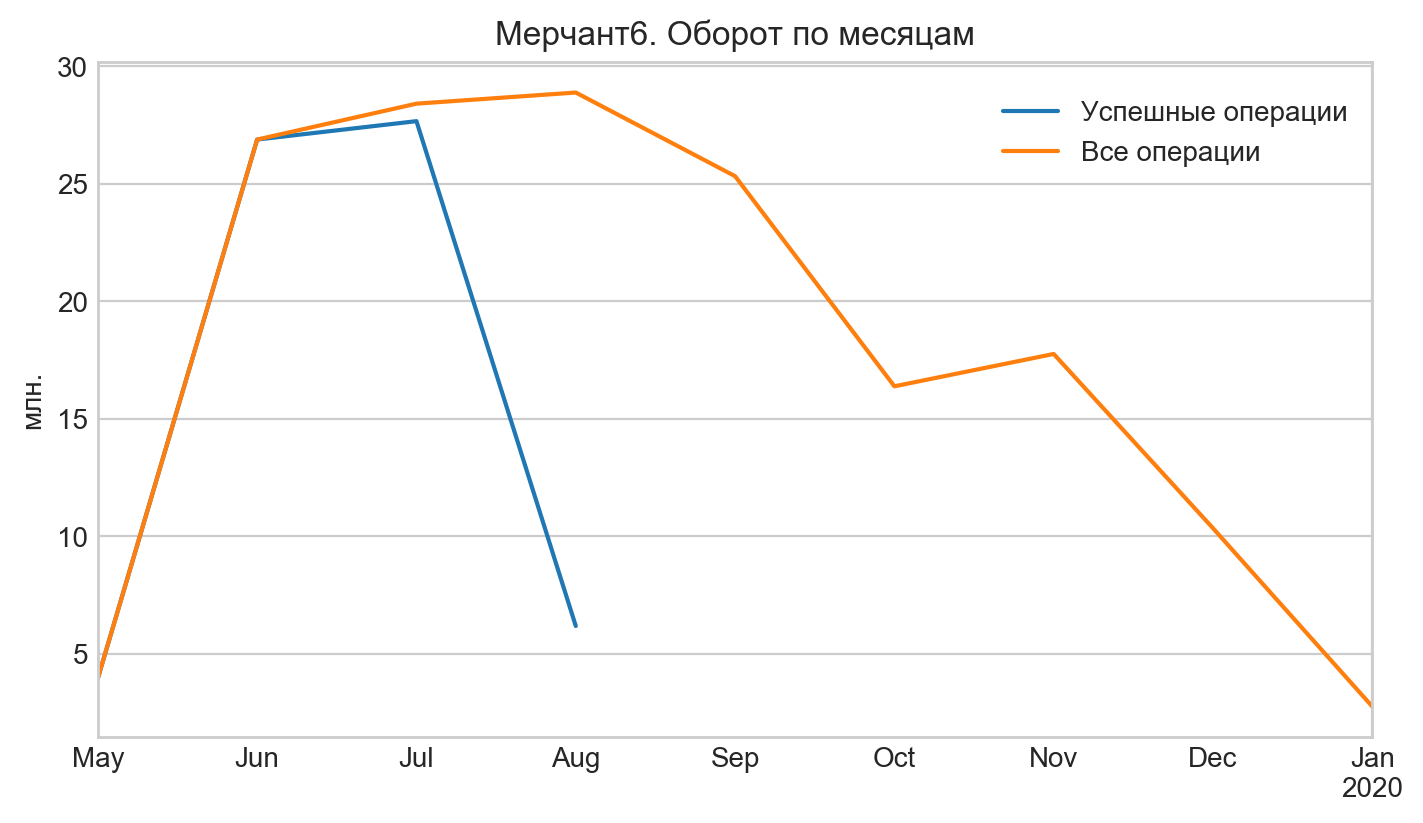

In [13]:
plt.figure(figsize=(7, 4), constrained_layout=True)
suc_income_plot = (suc_income_6 / 1000000).plot()
income_plot = (income_6 / 1000000).plot()
print('Оборот по успешным операциям ∼ {} млн.'.format(round(suc_merchunt6['Оборот'].sum() / 1000000)))
print('Оборот по всем операциям ∼ {} млн.'.format(round(merchunt6['Оборот'].sum() / 1000000)))
suc_income_plot.set_title('Мерчант6. Оборот по месяцам')
plt.ylabel('млн.')
plt.xlabel('')
plt.legend(['Успешные операции', 'Все операции'], bbox_to_anchor=(1, 0.98), fontsize=10)

Доход по успешным операциям ∼ 0.0 тыс.
Доход по всем операциям ∼ 391.0 тыс.


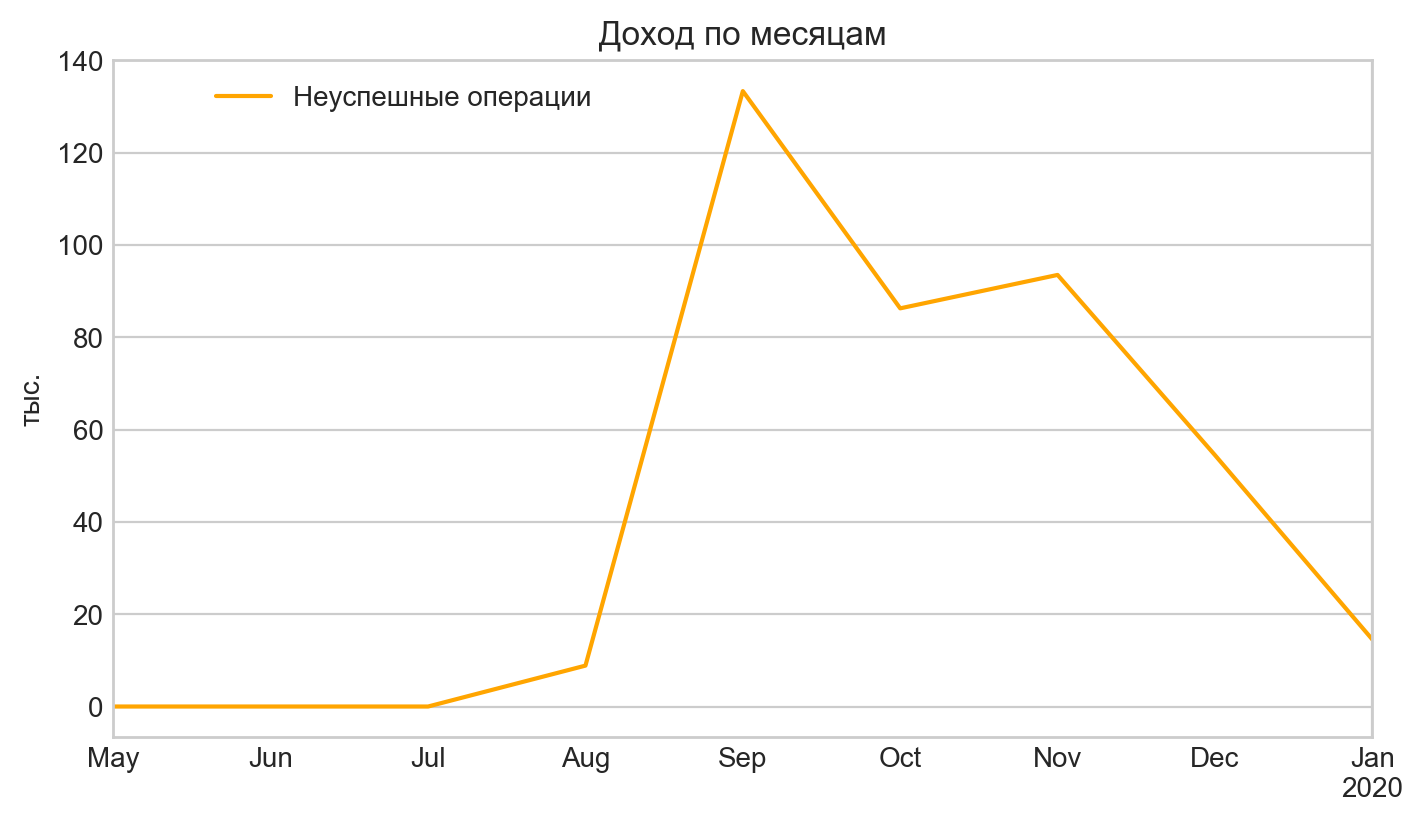

In [14]:
plt.figure(figsize=(7, 4), constrained_layout=True)
profit_plot = (profit_6 / 1000).plot(color='orange')
print('Доход по успешным операциям ∼ {} тыс.'.format(round(suc_merchunt6['Доход от мерчанта'].sum() / 1000)))
print('Доход по всем операциям ∼ {} тыс.'.format(round(merchunt6['Доход от мерчанта'].sum() / 1000)))
profit_plot.set_title('Доход по месяцам')
plt.ylabel('тыс.')
plt.xlabel('')
plt.legend(['Неуспешные операции'], bbox_to_anchor=(0.40, 1), fontsize=10)

In [15]:
suc_operations_out6 = suc_operations[suc_operations['Мерчант'] != 'Мерчант6']
df_out6 = df[df['Мерчант'] != 'Мерчант6']

suc_profit_out6 = suc_operations_out6.groupby('Месяц')['Доход от мерчанта'].sum()
suc_income_out6 = suc_operations_out6.groupby('Месяц')['Оборот'].sum()

profit_out6 = df_out6.groupby('Месяц')['Доход от мерчанта'].sum()
income_out6 = df_out6.groupby('Месяц')['Оборот'].sum()

Оборот по успешным операциям ∼ 115.0 млн.
Оборот по всем операциям ∼ 254.0 млн.


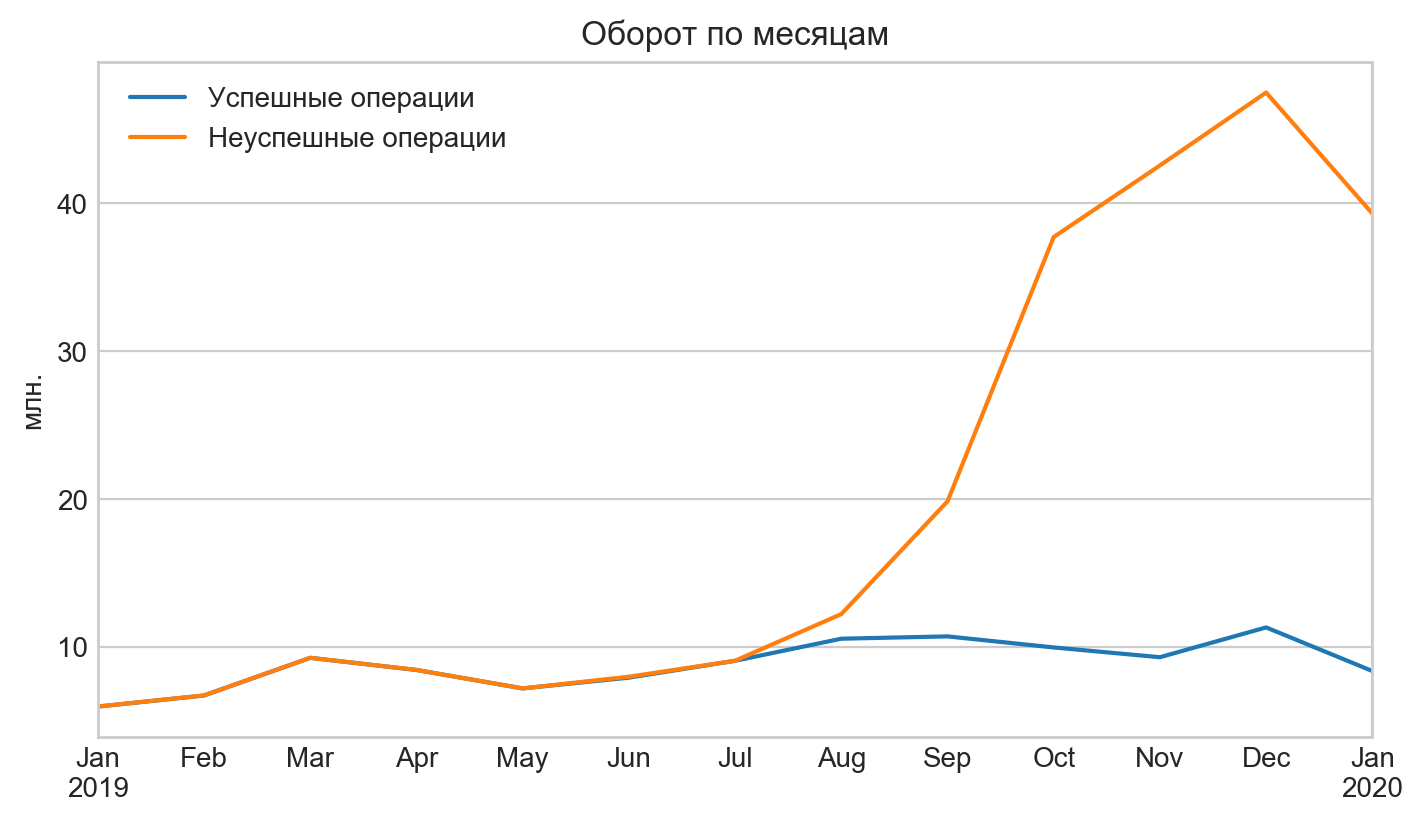

In [16]:
plt.figure(figsize=(7, 4), constrained_layout=True)
suc_income_out6_plot = (suc_income_out6 / 1000000).plot()
income_out6_plot = (income_out6 / 1000000).plot()
print('Оборот по успешным операциям ∼ {} млн.'.format(round(suc_operations_out6['Оборот'].sum() / 1000000)))
print('Оборот по всем операциям ∼ {} млн.'.format(round(df_out6['Оборот'].sum() / 1000000)))
suc_income_out6_plot.set_title('Оборот по месяцам')
plt.ylabel('млн.')
plt.xlabel('')
plt.legend(['Успешные операции', 'Неуспешные операции'], bbox_to_anchor=(0.34, 1), fontsize=10)

Доход по успешным операциям ∼ 115008.0 млн.
Доход по всем операциям ∼ 253917.0 млн.


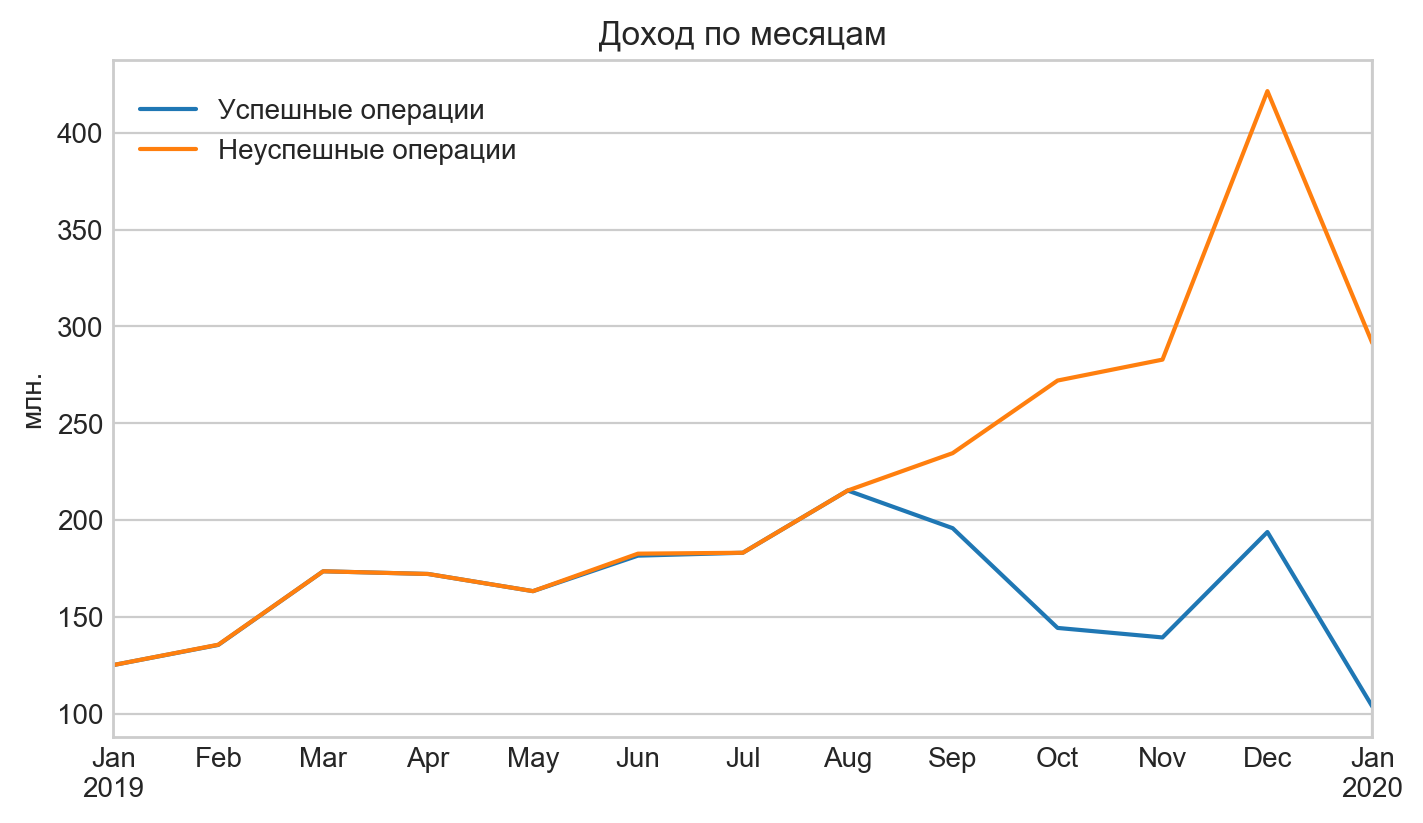

In [17]:
plt.figure(figsize=(7, 4), constrained_layout=True)
suc_profit_out6_plot = (suc_profit_out6 / 1000).plot()
profit_out6_plot = (profit_out6 / 1000).plot()
print('Доход по успешным операциям ∼ {} млн.'.format(round(suc_operations_out6['Оборот'].sum() / 1000)))
print('Доход по всем операциям ∼ {} млн.'.format(round(df_out6['Оборот'].sum() / 1000)))
suc_profit_out6_plot.set_title('Доход по месяцам')
plt.ylabel('млн.')
plt.xlabel('')
plt.legend(['Успешные операции', 'Неуспешные операции'], bbox_to_anchor=(0.34, 0.98), fontsize=10)

In [18]:
merchunts_income_2019 = suc_operations_out6.groupby('Мерчант')['Оборот'].sum()

In [20]:
merchunts_categories = df[['Мерчант', 'Категория мерчанта']].drop_duplicates().set_index('Мерчант')

In [21]:
merchunts_to_research = merchunts_income_2019[merchunts_income_2019 >= merchunts_income_2019['Мерчант7']]
merchunts_to_research_low_in = merchunts_to_research[merchunts_to_research <= merchunts_to_research['Мерчант56']]
merchunts_to_research_high_in = merchunts_to_research[merchunts_to_research >= merchunts_to_research['Мерчант18']]

In [22]:
colors = ['w' for _ in range(len(merchunts_income_2019))]
colors[:len(merchunts_to_research_high_in)] = ['orange' for _ in range(len(merchunts_to_research_high_in))]
colors[len(merchunts_to_research_high_in):len(merchunts_to_research_high_in) + len(merchunts_to_research_low_in)] \
        = ['b' for _ in range(len(merchunts_to_research_low_in))]

edge_colors = ['w' for _ in range(len(merchunts_income_2019))]
edge_colors[:len(merchunts_to_research_high_in)] = ['yellow' for _ in range(len(merchunts_to_research_high_in))]
edge_colors[len(merchunts_to_research_high_in):len(merchunts_to_research_high_in) + len(merchunts_to_research_low_in)] \
        = ['b' for _ in range(len(merchunts_to_research_low_in))]

In [23]:
dic = {'Категория1': 'k', 'Категория2': 'red', 'Категория3': 'green'}
merchunts_income_2019.sort_values().index
edge_colors = []
for ind in merchunts_income_2019.sort_values().index:
    edge_colors.append(dic[merchunts_categories.loc[ind, 'Категория мерчанта']])


Text(0.5, 0.03999999999999998, 'Категория 3 ')

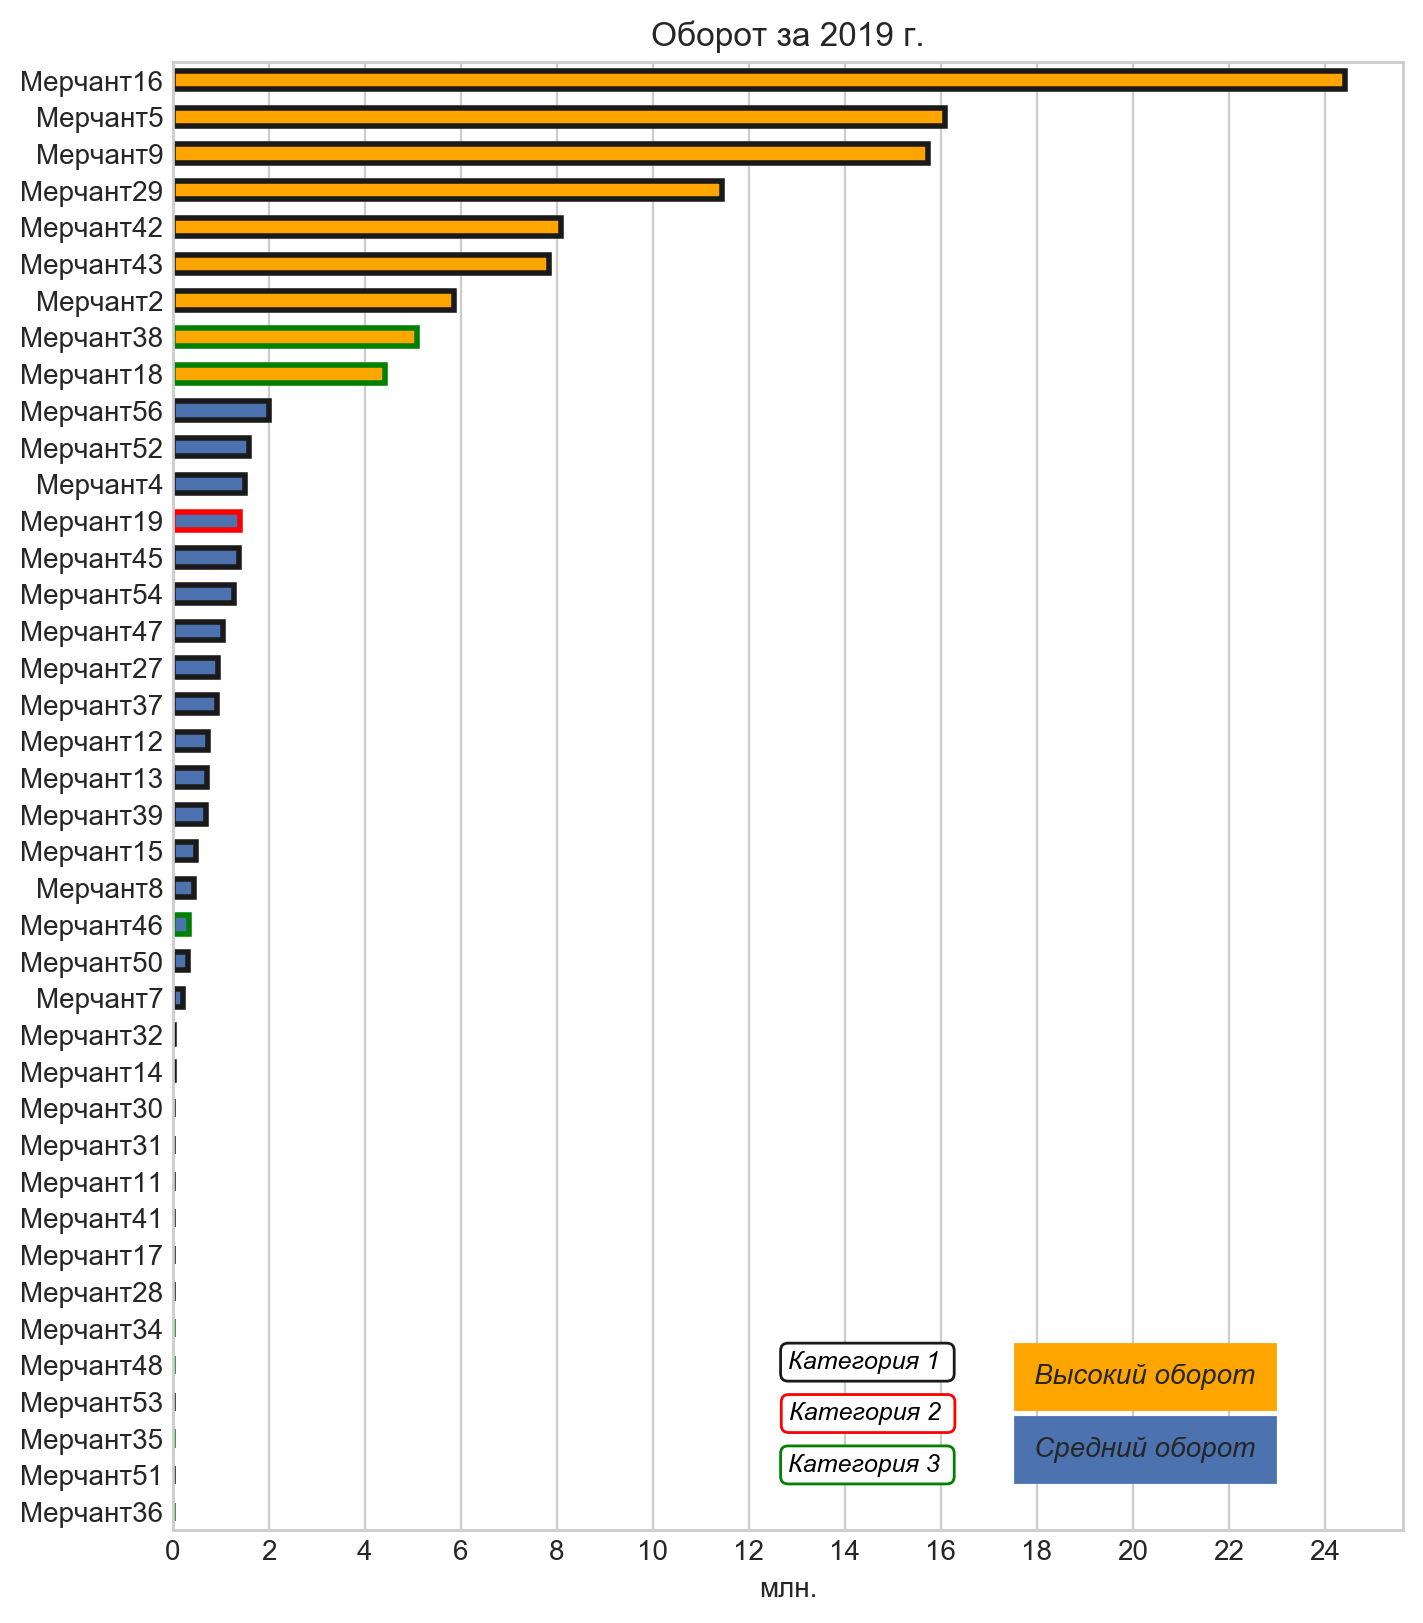

In [24]:
fig, ax = plt.subplots(figsize=(7, 8), constrained_layout=True)

merchunts_plot = (merchunts_income_2019.sort_values() / 1e6).plot(kind='barh', color=colors[::-1], \
                                                                  edgecolor=edge_colors, linewidth=2)
plt.xlabel('млн.')
plt.ylabel('')
merchunts_plot.set_title('Оборот за 2019 г.')

x = .25
y = -.45

ax.grid(axis = 'y')
merchunts_plot.xaxis.set_major_locator(ticker.MultipleLocator(2))

ax.text(.45 + x, .5 + y, 'Средний оборот', transform=ax.transAxes, style='italic',
        bbox={'facecolor':'b', 'edgecolor': 'b', 'alpha':1, 'pad':7})

ax.text(.45 + x, .55 + y, 'Высокий оборот', transform=ax.transAxes, style='italic',
        bbox={'facecolor':'orange', 'edgecolor': 'orange', 'alpha':1, 'pad':7})

box_1 = {'facecolor':'white',   
       'edgecolor': 'k',     
       'boxstyle': 'round'}  
box_2 = {'facecolor':'white',  
       'edgecolor': 'red',  
       'boxstyle': 'round'}  
box_3 = {'facecolor':'white',
       'edgecolor': 'green', 
       'boxstyle': 'round'}

ax.text(.25 + x, .56 + y, 'Категория 1 ',
        transform=ax.transAxes,
        style='italic',
        bbox = box_1,
        color = 'black', 
        fontsize = 9)

ax.text(.315 + x, .525 + y, 'Категория 2 ',
        transform=ax.transAxes,
        style='italic',
        bbox = box_2,
        horizontalalignment = 'center',
        color = 'black',
        fontsize = 9)

ax.text(.25 + x, .49 + y, 'Категория 3 ',
        transform=ax.transAxes,
        style='italic',
        bbox = box_3,
        color = 'black',
        fontsize = 9)


In [25]:
h_merch_names = set(merchunts_to_research_high_in.index)
h_merch = suc_operations_out6[suc_operations_out6['Мерчант'].isin(h_merch_names)]

In [26]:
h_merch = suc_operations_out6[suc_operations_out6['Мерчант'].isin(h_merch_names)]
h_merch['Net Revenue'] = h_merch['Доход от мерчанта'] + h_merch['Расход на МПС']

h_merch_properties = h_merch.groupby('Мерчант')['Оборот', 'Количество транзакций', 'Доход от мерчанта', 'Расход на МПС', 'Net Revenue'].sum()

Text(0.5, 0, '')

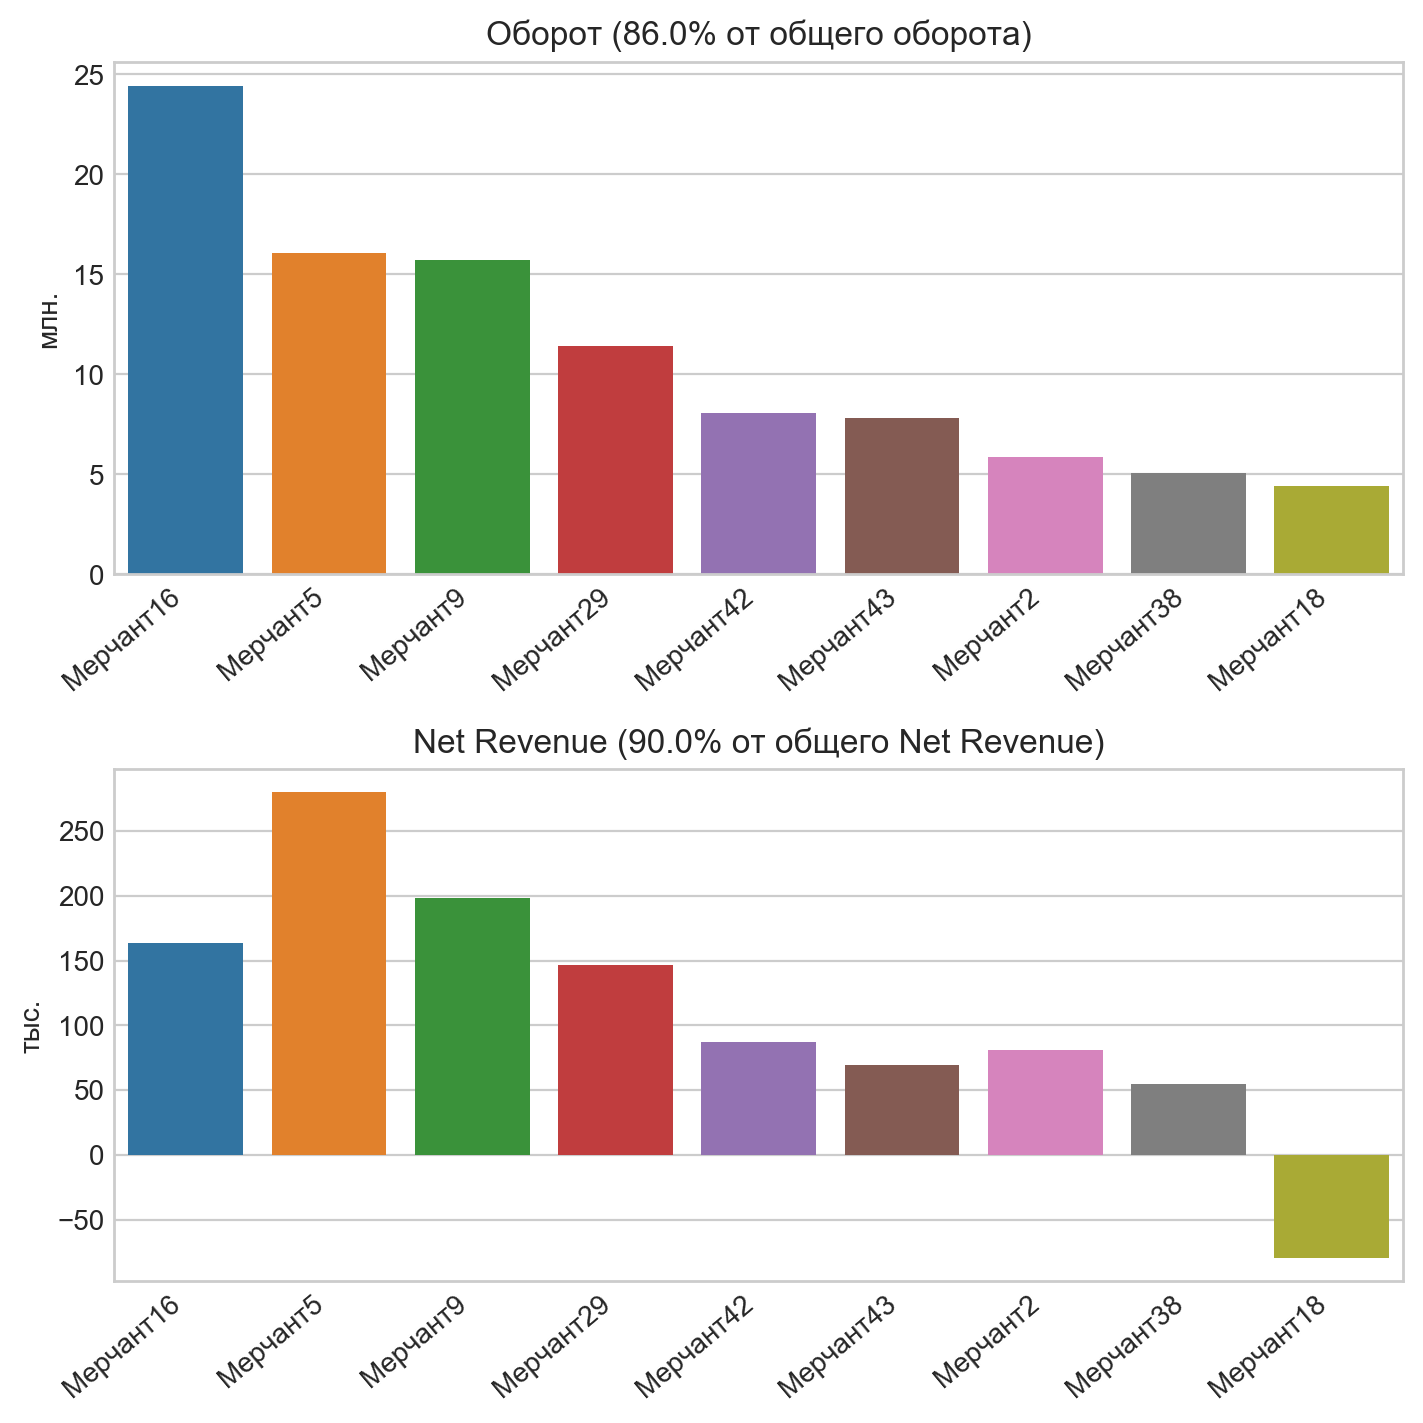

In [27]:
fg = plt.figure(figsize=(7, 7), constrained_layout=True)
gs = fg.add_gridspec(2, 1)

income_part = h_merch_properties['Оборот'].sum() / suc_income_out6.sum()
NR_part = h_merch_properties['Net Revenue'].sum() / df_out6['Net Revenue'].sum()

fig_ax_1 = fg.add_subplot(gs[0, 0])
fig_ax_1.set_title('Оборот ({}% от общего оборота)'.format(round(income_part * 100)))
chart1 = sns.barplot(h_merch_properties.index, h_merch_properties['Оборот'] / 1e6, \
                    order=h_merch_properties['Оборот'].sort_values(ascending=False).index)
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=40, horizontalalignment='right')
plt.ylabel('млн.')
plt.xlabel('')

fig_ax_2 = fg.add_subplot(gs[1, 0])
fig_ax_2.set_title('Net Revenue ({}% от общего Net Revenue)'.format(round(NR_part * 100)))
chart2 = sns.barplot(h_merch_properties.index, h_merch_properties['Net Revenue'] / 1e3, \
                    order=h_merch_properties['Оборот'].sort_values(ascending=False).index)
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=40, horizontalalignment='right')
plt.ylabel('тыс.')
plt.xlabel('')

In [28]:
year = df['Месяц'].unique()
merchunts_income = pd.DataFrame(index=h_merch_properties['Оборот'].sort_values(ascending=False).index, columns=year)

for merchunt in h_merch_properties['Оборот'].sort_values(ascending=False).index:
    for month in year:
         merchunts_income.loc[merchunt, month] = h_merch[(h_merch['Мерчант'] == merchunt) \
                                                         & (h_merch['Месяц'] == month)]['Оборот'].sum()

In [29]:
merchunts_NR = pd.DataFrame(index=h_merch_properties['Оборот'].sort_values(ascending=False).index, columns=year)

for merchunt in h_merch_properties['Оборот'].sort_values(ascending=False).index:
    for month in year:
         merchunts_NR.loc[merchunt, month] = h_merch[(h_merch['Мерчант'] == merchunt) \
                                                     & (h_merch['Месяц'] == month)]['Net Revenue'].sum()

Text(0.5, 0, '')

<Figure size 700x700 with 0 Axes>

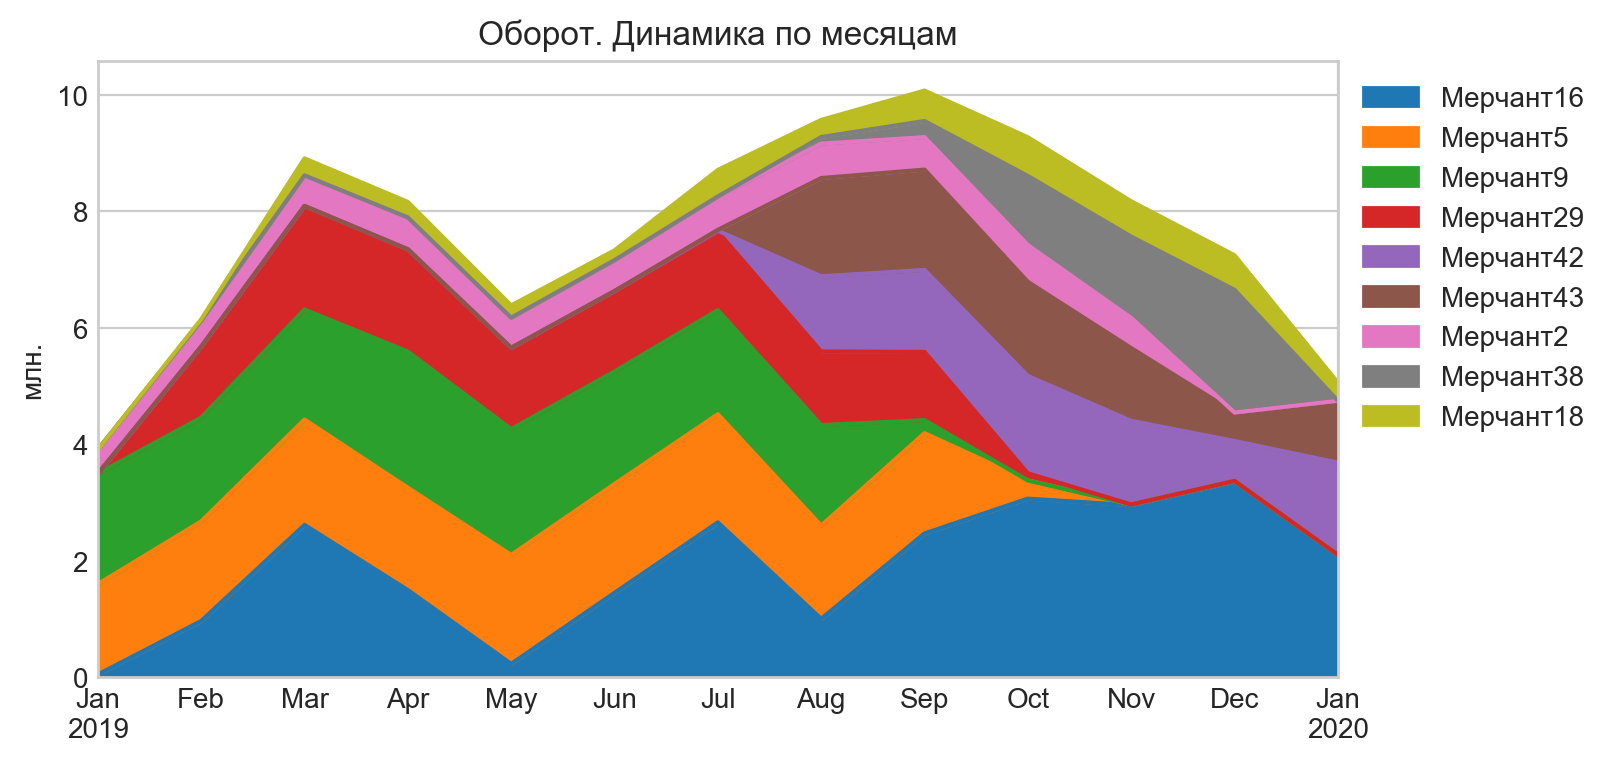

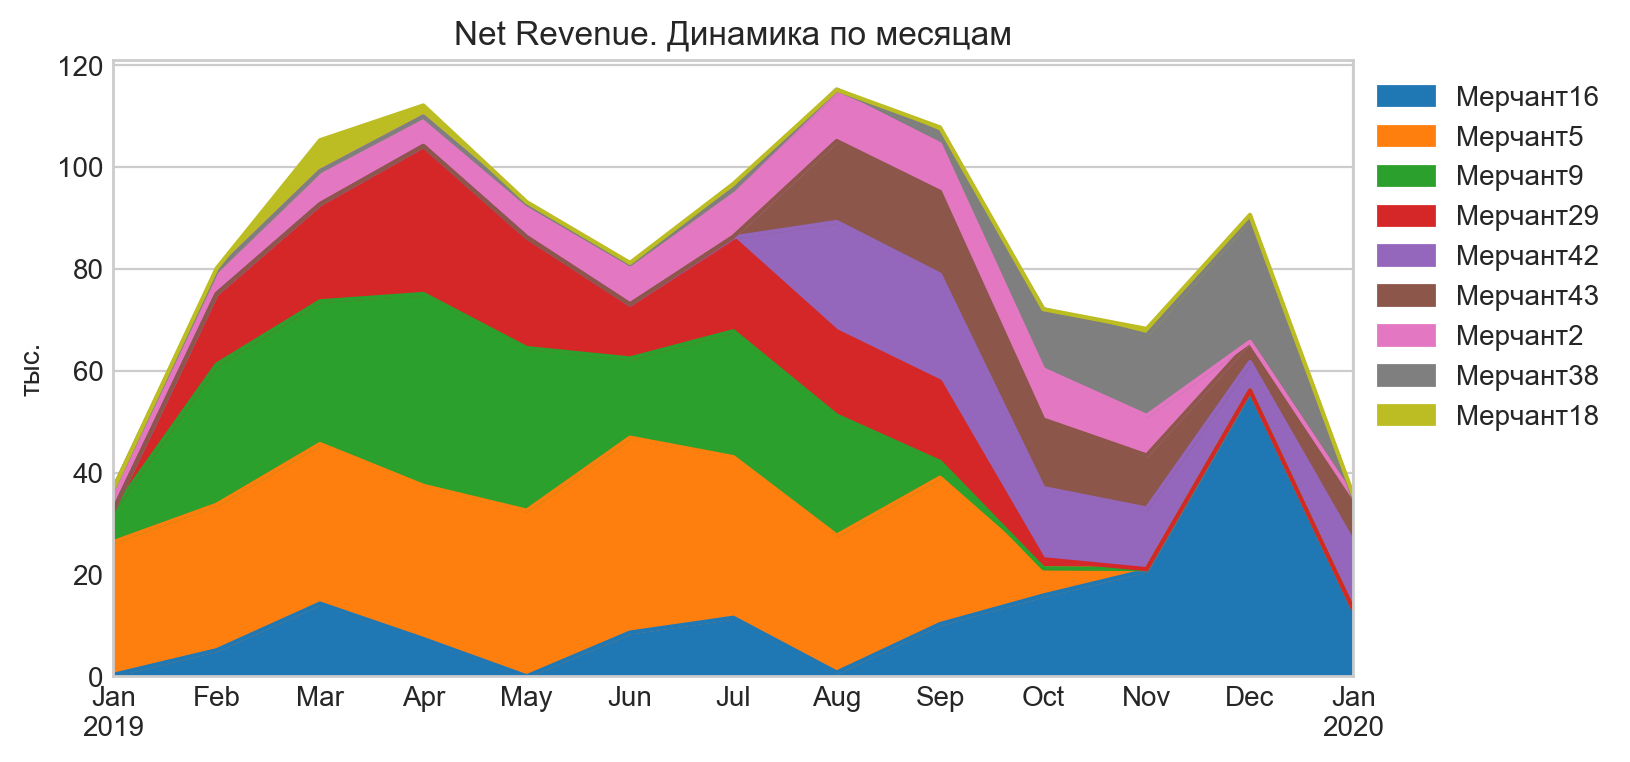

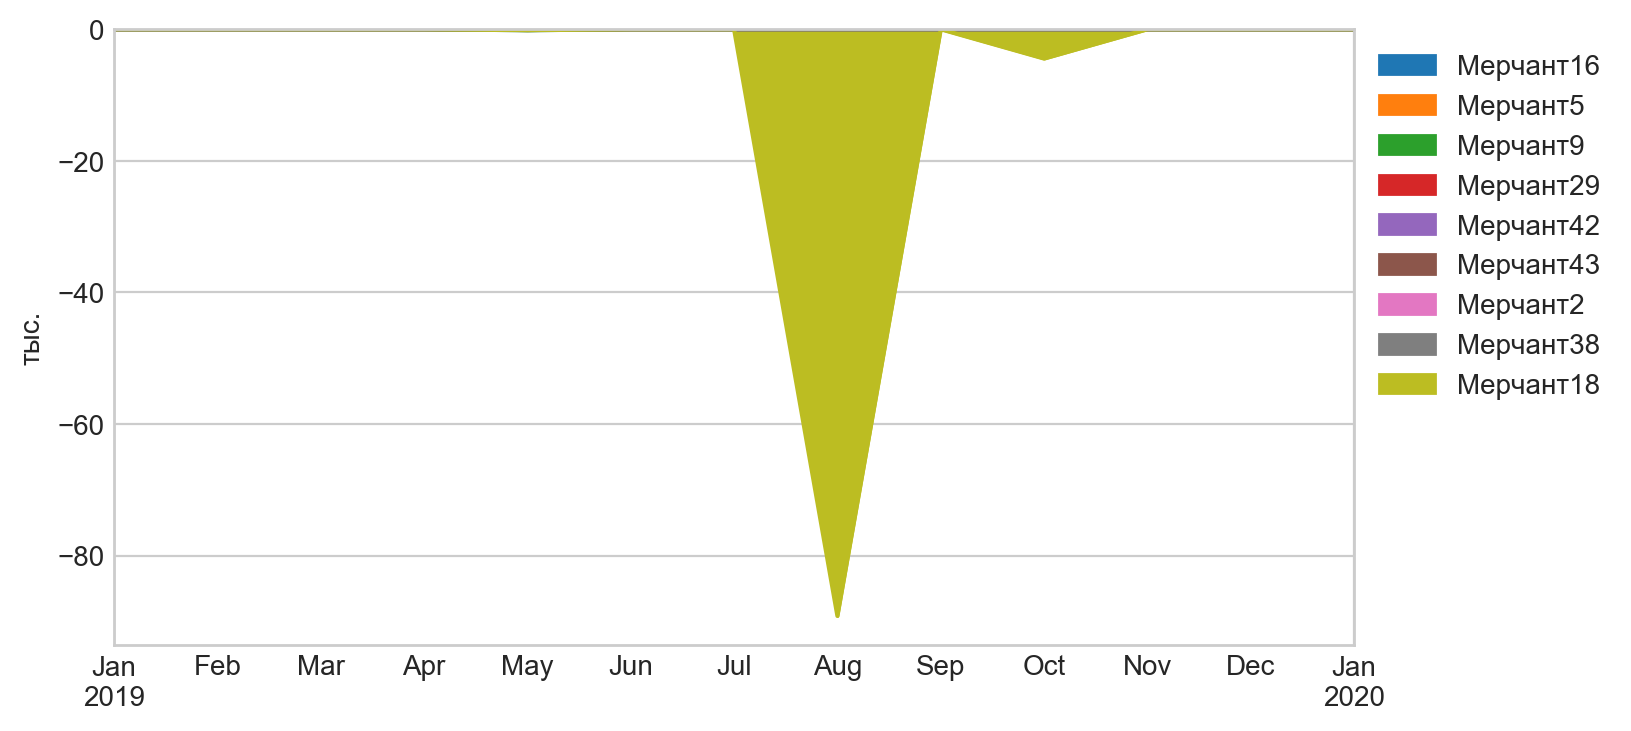

In [30]:
fg = plt.figure(figsize=(7, 7), constrained_layout=True)

merchunts_income_per_month = (merchunts_income / 1e6).T.plot(kind='area', \
                                                             title='Оборот. Динамика по месяцам')
merchunts_income_per_month.legend(bbox_to_anchor=(1, 1), fontsize=10)
plt.ylabel('млн.')
plt.xlabel('')

merchunts_profit_per_month = (merchunts_NR[merchunts_NR >= 0] / 1e3).T.plot(kind='area', \
                                                             title='Net Revenue. Динамика по месяцам')
merchunts_profit_per_month.legend(bbox_to_anchor=(1, 1), fontsize=10)
plt.ylabel('тыс.')
plt.xlabel('')

merchunts_profit_per_month = (merchunts_NR[merchunts_NR <= 0] / 1e3).T.plot(kind='area')
merchunts_profit_per_month.legend(bbox_to_anchor=(1, 1), fontsize=10)
plt.ylabel('тыс.')
plt.xlabel('')

Text(0.5, 0, '')

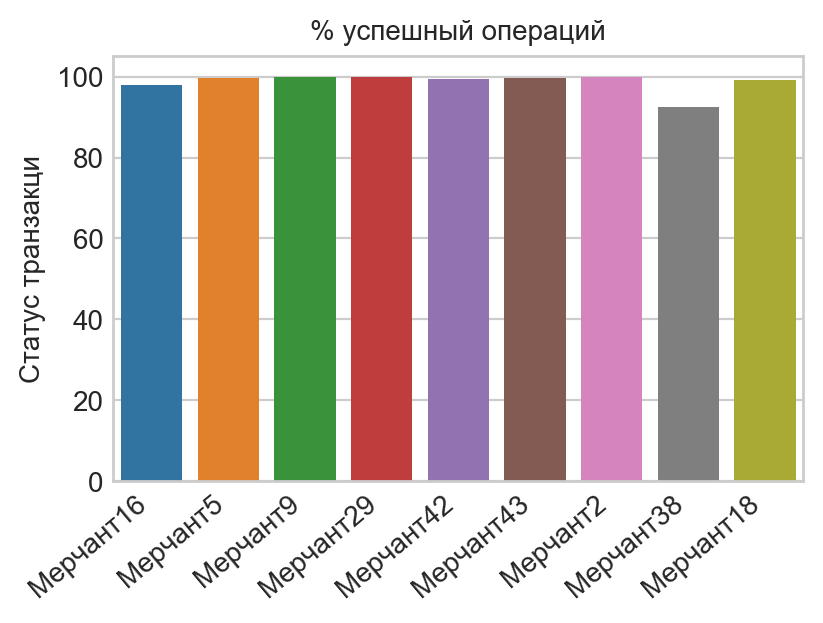

In [32]:
h_merch_total_trans = df_out6[df_out6['Мерчант'].isin(h_merch_names)].groupby('Мерчант')['Статус транзакци'].count()
h_merch_suc_trans = suc_operations[suc_operations['Мерчант'].isin(h_merch_names)].groupby('Мерчант')['Статус транзакци'].count()

percent = h_merch_suc_trans / h_merch_total_trans

plt.figure(figsize=(4, 3), constrained_layout=True)

suc_operations_percent = sns.barplot(percent.index, percent * 100, \
                    order=h_merch_properties['Оборот'].sort_values(ascending=False).index)
suc_operations_percent.set_title('% успешный операций', fontsize=10)
suc_operations_percent.set_xticklabels(suc_operations_percent.get_xticklabels(), rotation=40, horizontalalignment='right')
plt.xlabel('')

In [33]:
l_merch_names = set(merchunts_to_research_low_in.index)
l_merch = suc_operations_out6[suc_operations_out6['Мерчант'].isin(l_merch_names)]

In [34]:
l_merch = suc_operations_out6[suc_operations_out6['Мерчант'].isin(l_merch_names)]
l_merch['Net Revenue'] = l_merch['Доход от мерчанта'] + l_merch['Расход на МПС']

l_merch_properties = l_merch.groupby('Мерчант')['Оборот', 'Количество транзакций', 'Доход от мерчанта', 'Расход на МПС', 'Net Revenue'].sum()

Text(0.5, 0, '')

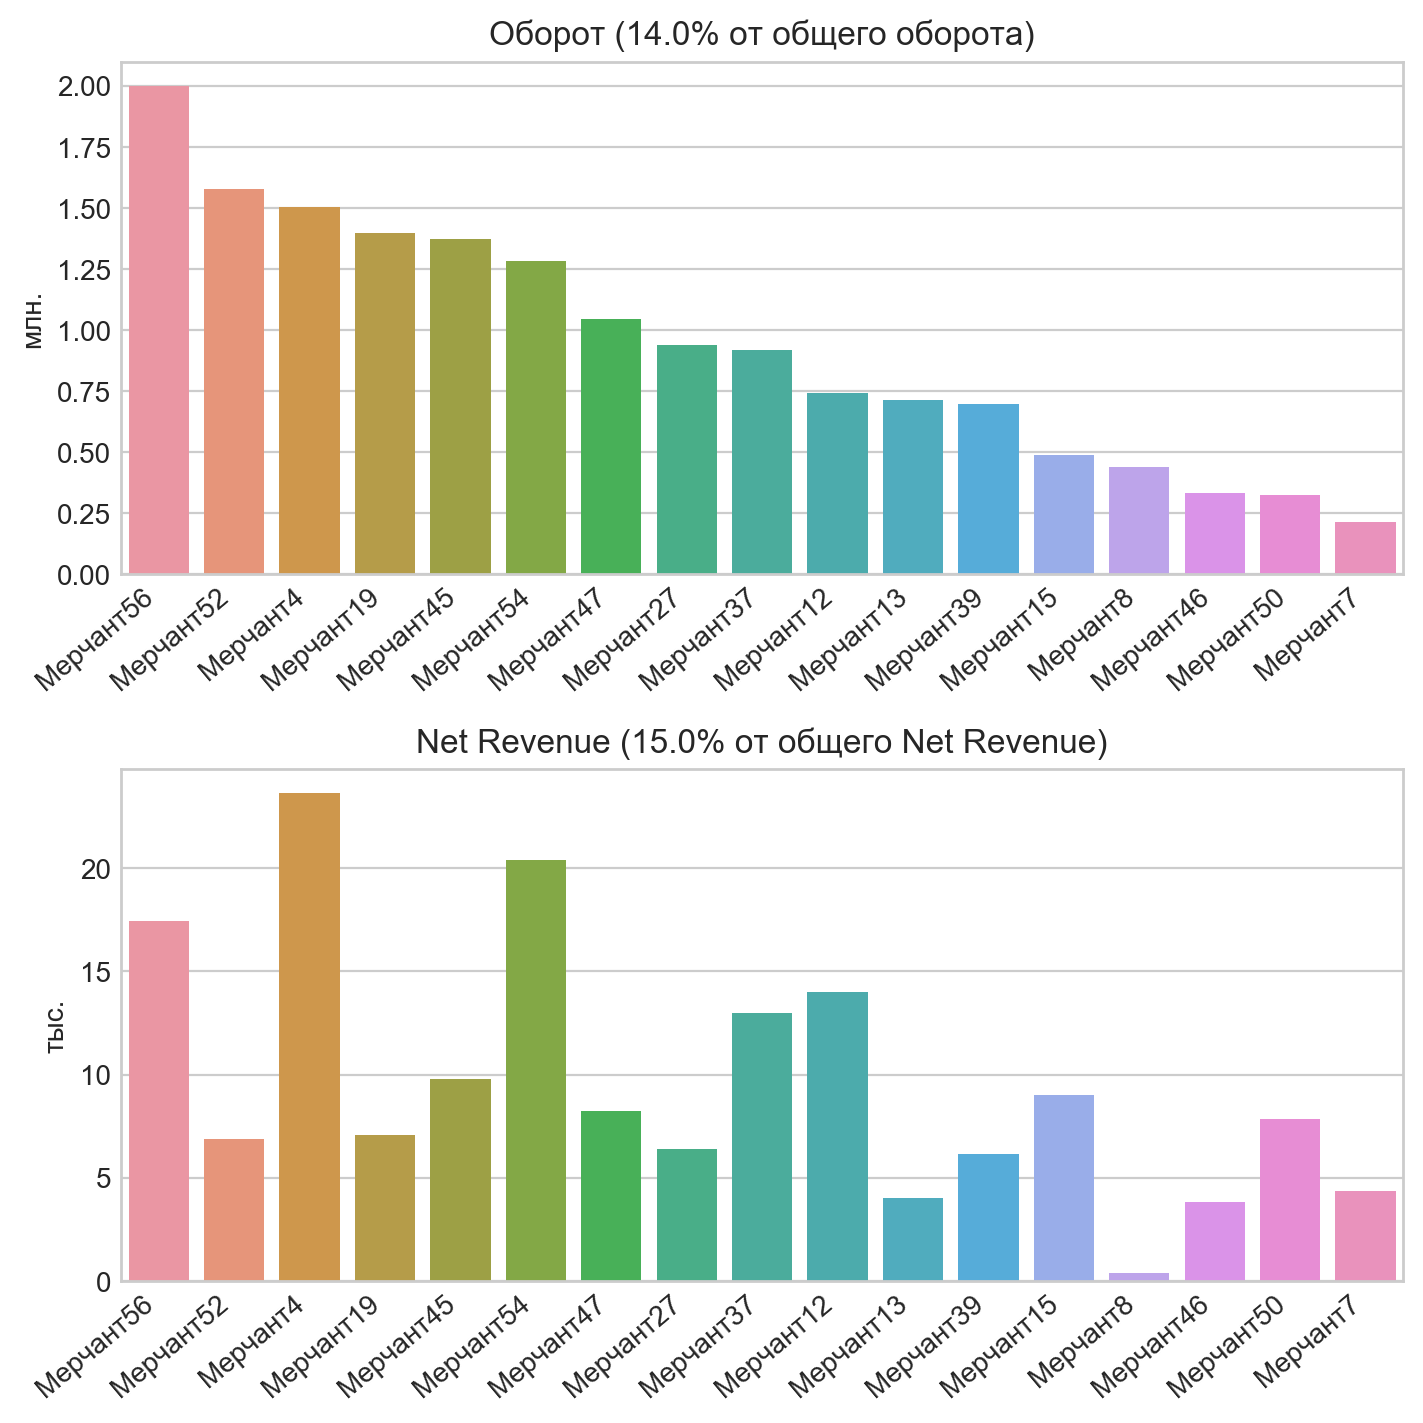

In [35]:
fg = plt.figure(figsize=(7, 7), constrained_layout=True)
gs = fg.add_gridspec(2, 1)

income_part = l_merch_properties['Оборот'].sum() / suc_income_out6.sum()
NR_part = l_merch_properties['Net Revenue'].sum() / df_out6['Net Revenue'].sum()

fig_ax_1 = fg.add_subplot(gs[0, 0])
fig_ax_1.set_title('Оборот ({}% от общего оборота)'.format(round(income_part * 100)))
chart1 = sns.barplot(l_merch_properties.index, l_merch_properties['Оборот'] / 1e6, \
                    order=l_merch_properties['Оборот'].sort_values(ascending=False).index)
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=40, horizontalalignment='right')
plt.ylabel('млн.')
plt.xlabel('')

fig_ax_2 = fg.add_subplot(gs[1, 0])
fig_ax_2.set_title('Net Revenue ({}% от общего Net Revenue)'.format(round(NR_part * 100)))
chart2 = sns.barplot(l_merch_properties.index, l_merch_properties['Net Revenue'] / 1e3, \
                    order=l_merch_properties['Оборот'].sort_values(ascending=False).index)
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=40, horizontalalignment='right')
plt.ylabel('тыс.')
plt.xlabel('')

In [36]:
year = df['Месяц'].unique()
merchunts_income = pd.DataFrame(index=l_merch_properties['Оборот'].sort_values(ascending=False).index, columns=year)

for merchunt in l_merch_properties['Оборот'].sort_values(ascending=False).index:
    for month in year:
         merchunts_income.loc[merchunt, month] = l_merch[(l_merch['Мерчант'] == merchunt) \
                                                         & (l_merch['Месяц'] == month)]['Оборот'].sum()

In [37]:
merchunts_NR = pd.DataFrame(index=l_merch_properties['Оборот'].sort_values(ascending=False).index, columns=year)

for merchunt in l_merch_properties['Оборот'].sort_values(ascending=False).index:
    for month in year:
         merchunts_NR.loc[merchunt, month] = l_merch[(l_merch['Мерчант'] == merchunt) \
                                                     & (l_merch['Месяц'] == month)]['Net Revenue'].sum()

Text(0.5, 0, '')

<Figure size 600x600 with 0 Axes>

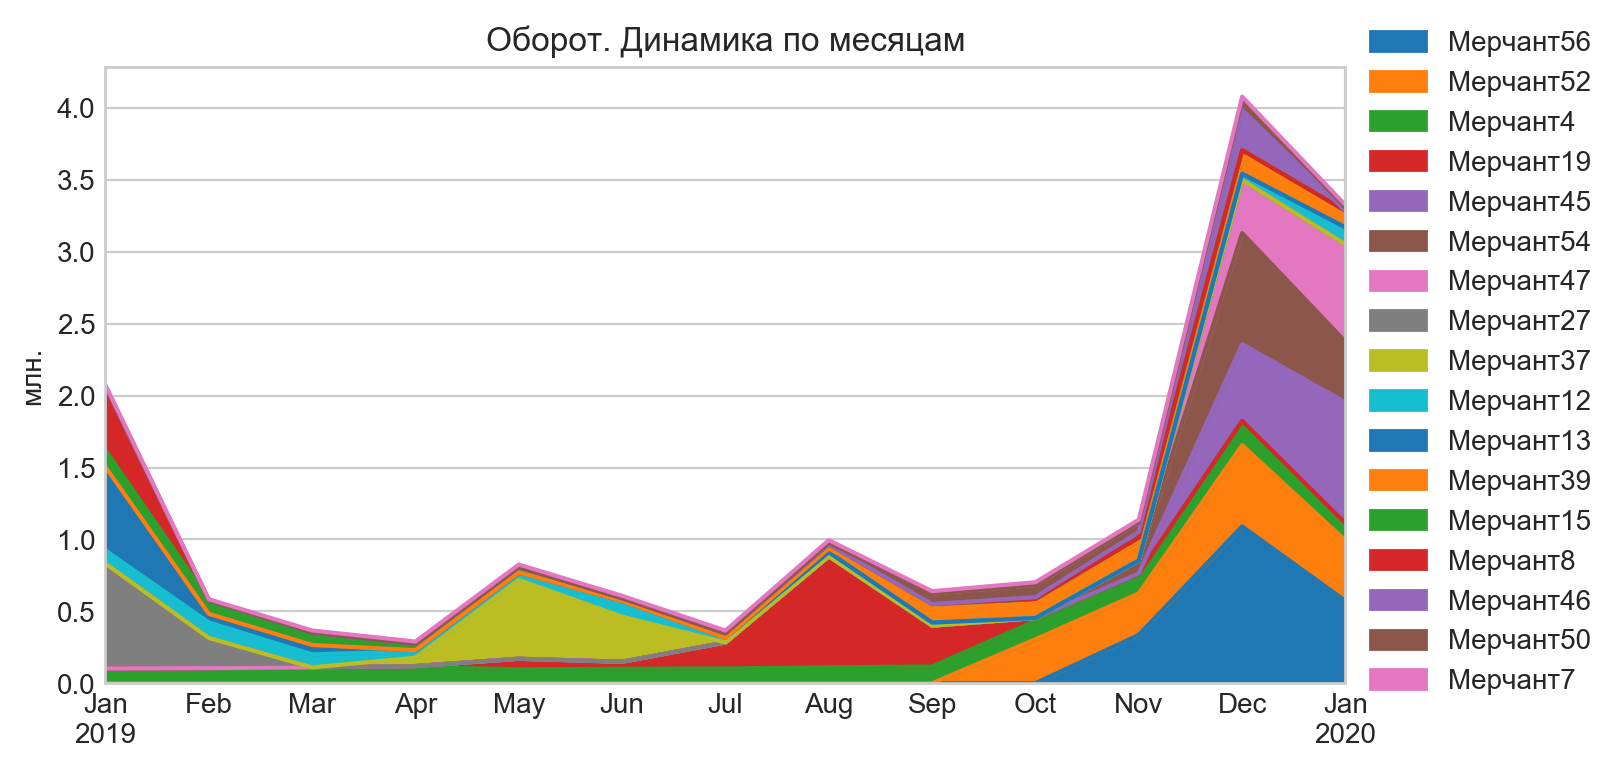

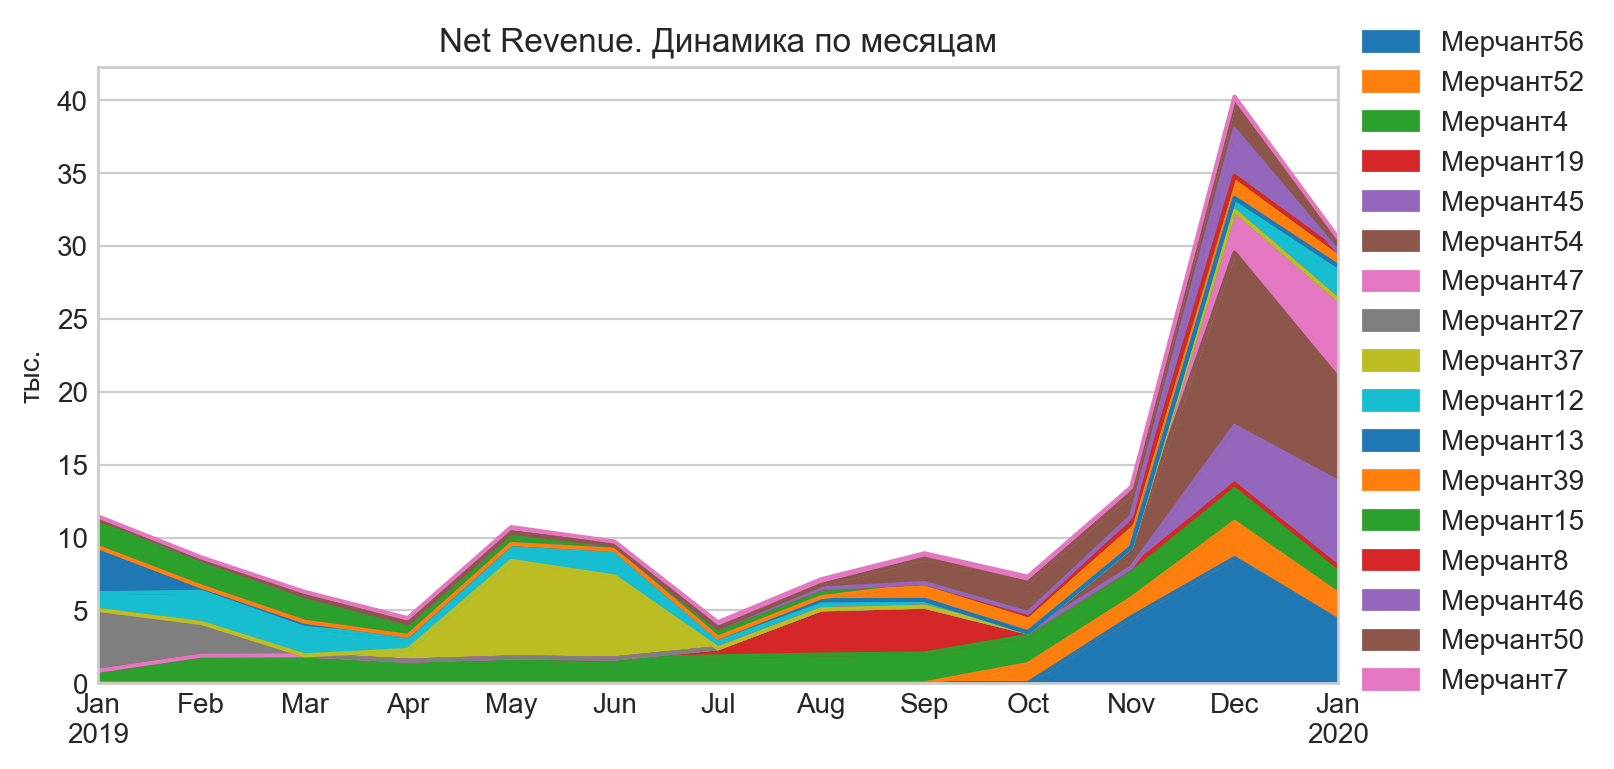

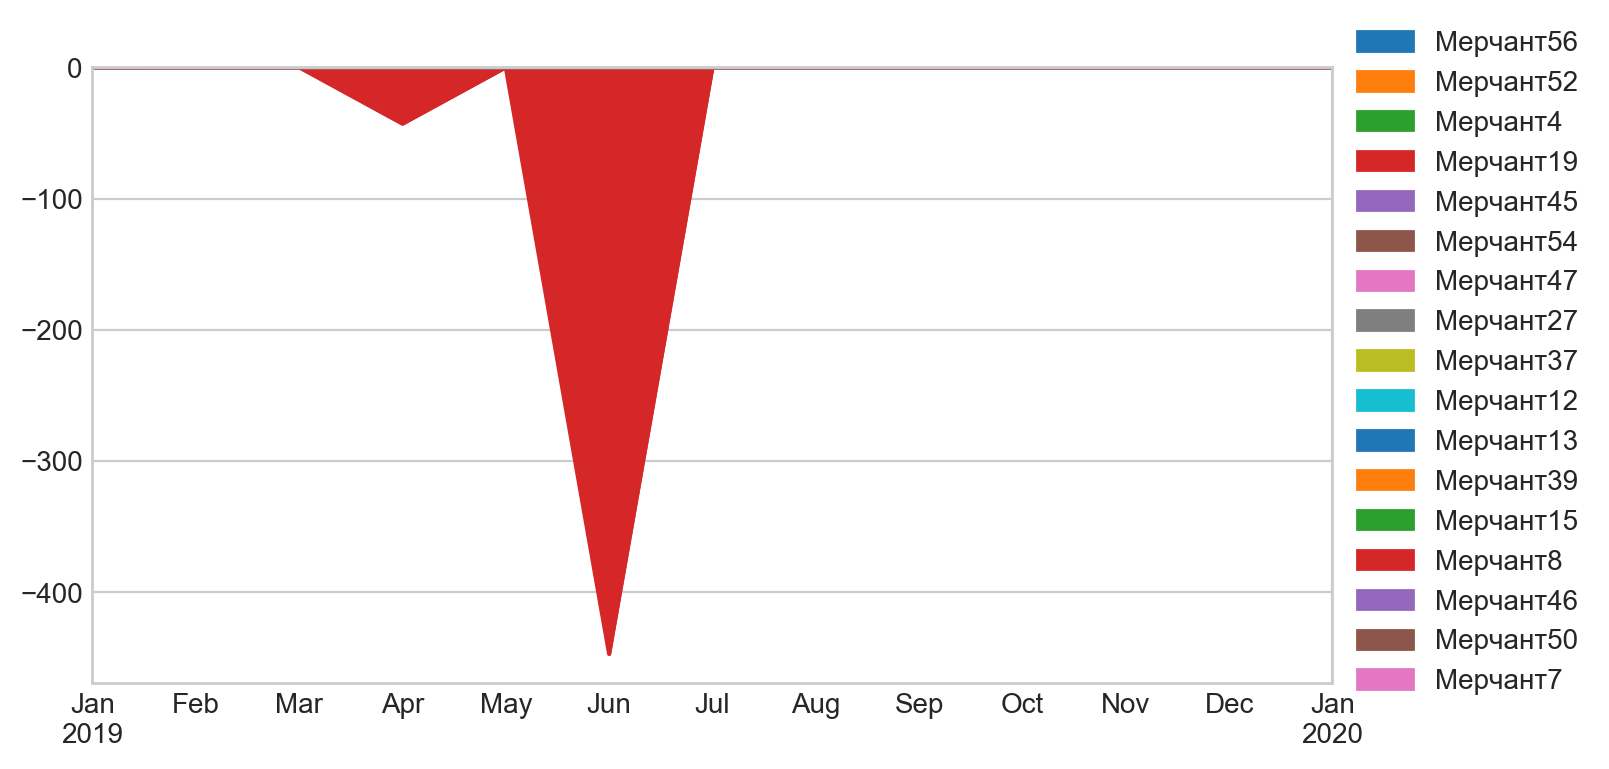

In [38]:
fg = plt.figure(figsize=(6, 6), constrained_layout=True)

merchunts_income_per_month = (merchunts_income / 1e6).T.plot(kind='area', \
                                                             title='Оборот. Динамика по месяцам')
merchunts_income_per_month.legend(bbox_to_anchor=(1, 1.1), fontsize=10)
plt.ylabel('млн.')
plt.xlabel('')

merchunts_profit_per_month = (merchunts_NR[merchunts_NR >= 0] / 1e3).T.plot(kind='area', \
                                                             title='Net Revenue. Динамика по месяцам')
merchunts_profit_per_month.legend(bbox_to_anchor=(1, 1.1), fontsize=10)
plt.ylabel('тыс.')
plt.xlabel('')

merchunts_profit_per_month = (merchunts_NR[merchunts_NR <= 0]).T.plot(kind='area')
merchunts_profit_per_month.legend(bbox_to_anchor=(1, 1.1), fontsize=10)
plt.ylabel('')
plt.xlabel('')

Text(0.5, 0, '')

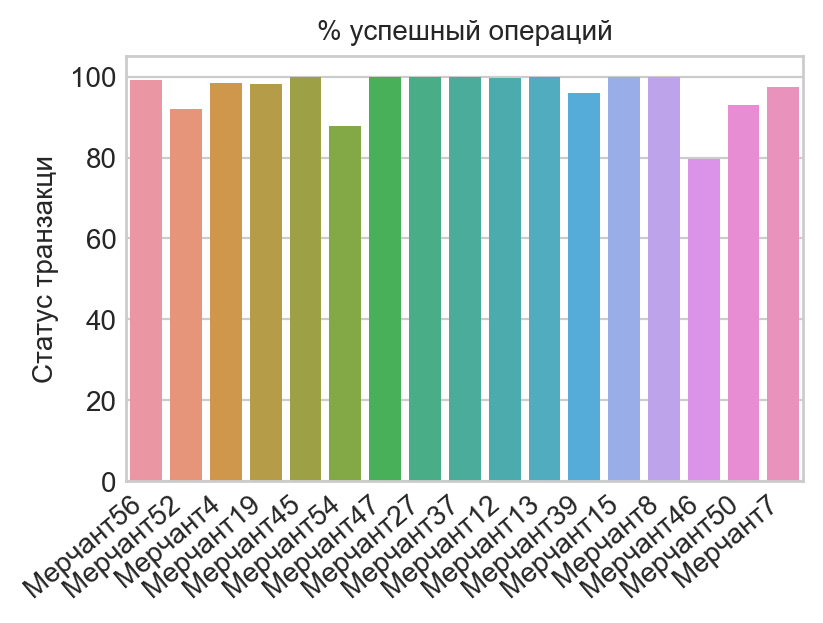

In [39]:
l_merch_total_trans = df_out6[df_out6['Мерчант'].isin(l_merch_names)].groupby('Мерчант')['Статус транзакци'].count()
l_merch_suc_trans = suc_operations[suc_operations['Мерчант'].isin(l_merch_names)].groupby('Мерчант')['Статус транзакци'].count()
percent = l_merch_suc_trans / l_merch_total_trans

plt.figure(figsize=(4, 3), constrained_layout=True)

suc_operations_percent = sns.barplot(percent.index, percent * 100, \
                    order=l_merch_properties['Оборот'].sort_values(ascending=False).index)
suc_operations_percent.set_title('% успешный операций', fontsize=10)
suc_operations_percent.set_xticklabels(suc_operations_percent.get_xticklabels(), rotation=40, horizontalalignment='right')
plt.xlabel('')

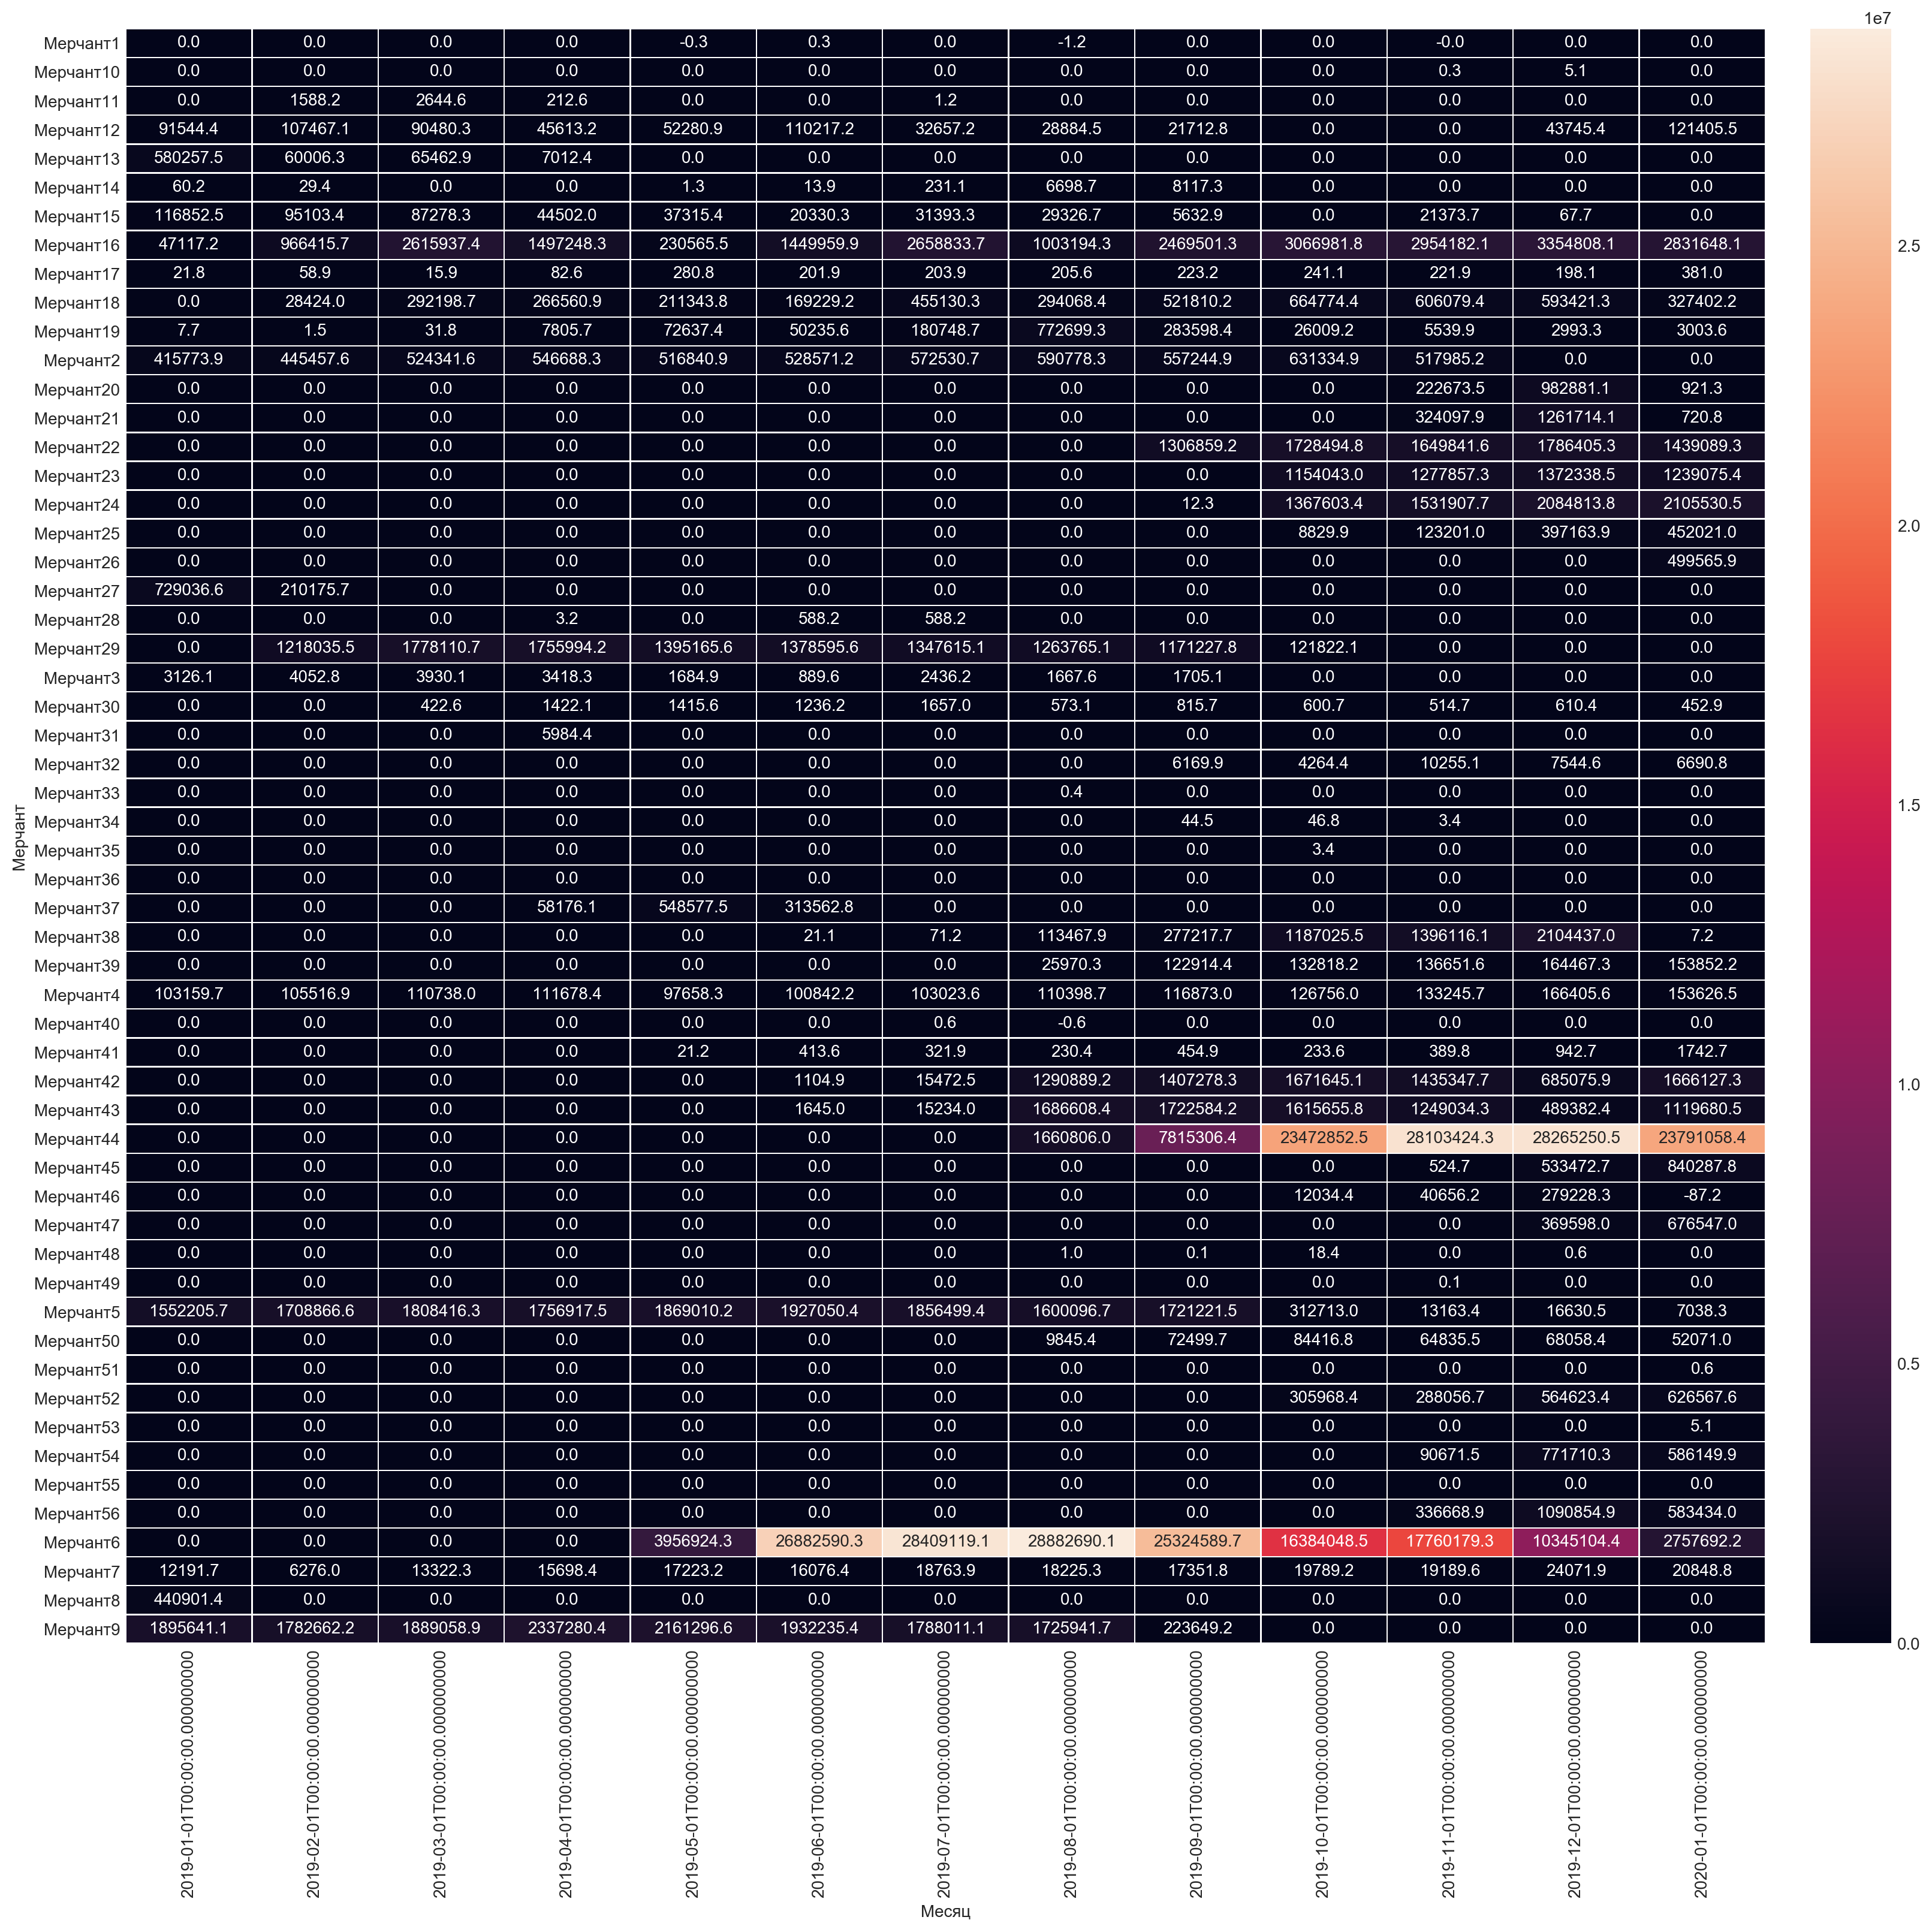

In [40]:
fg = plt.figure(figsize=(16, 16), constrained_layout=True)

platform_genre_sales = df.pivot_table(
                        index='Мерчант',
                        columns='Месяц',
                        values='Оборот',
                        aggfunc=sum).fillna(0)
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidth=.5)

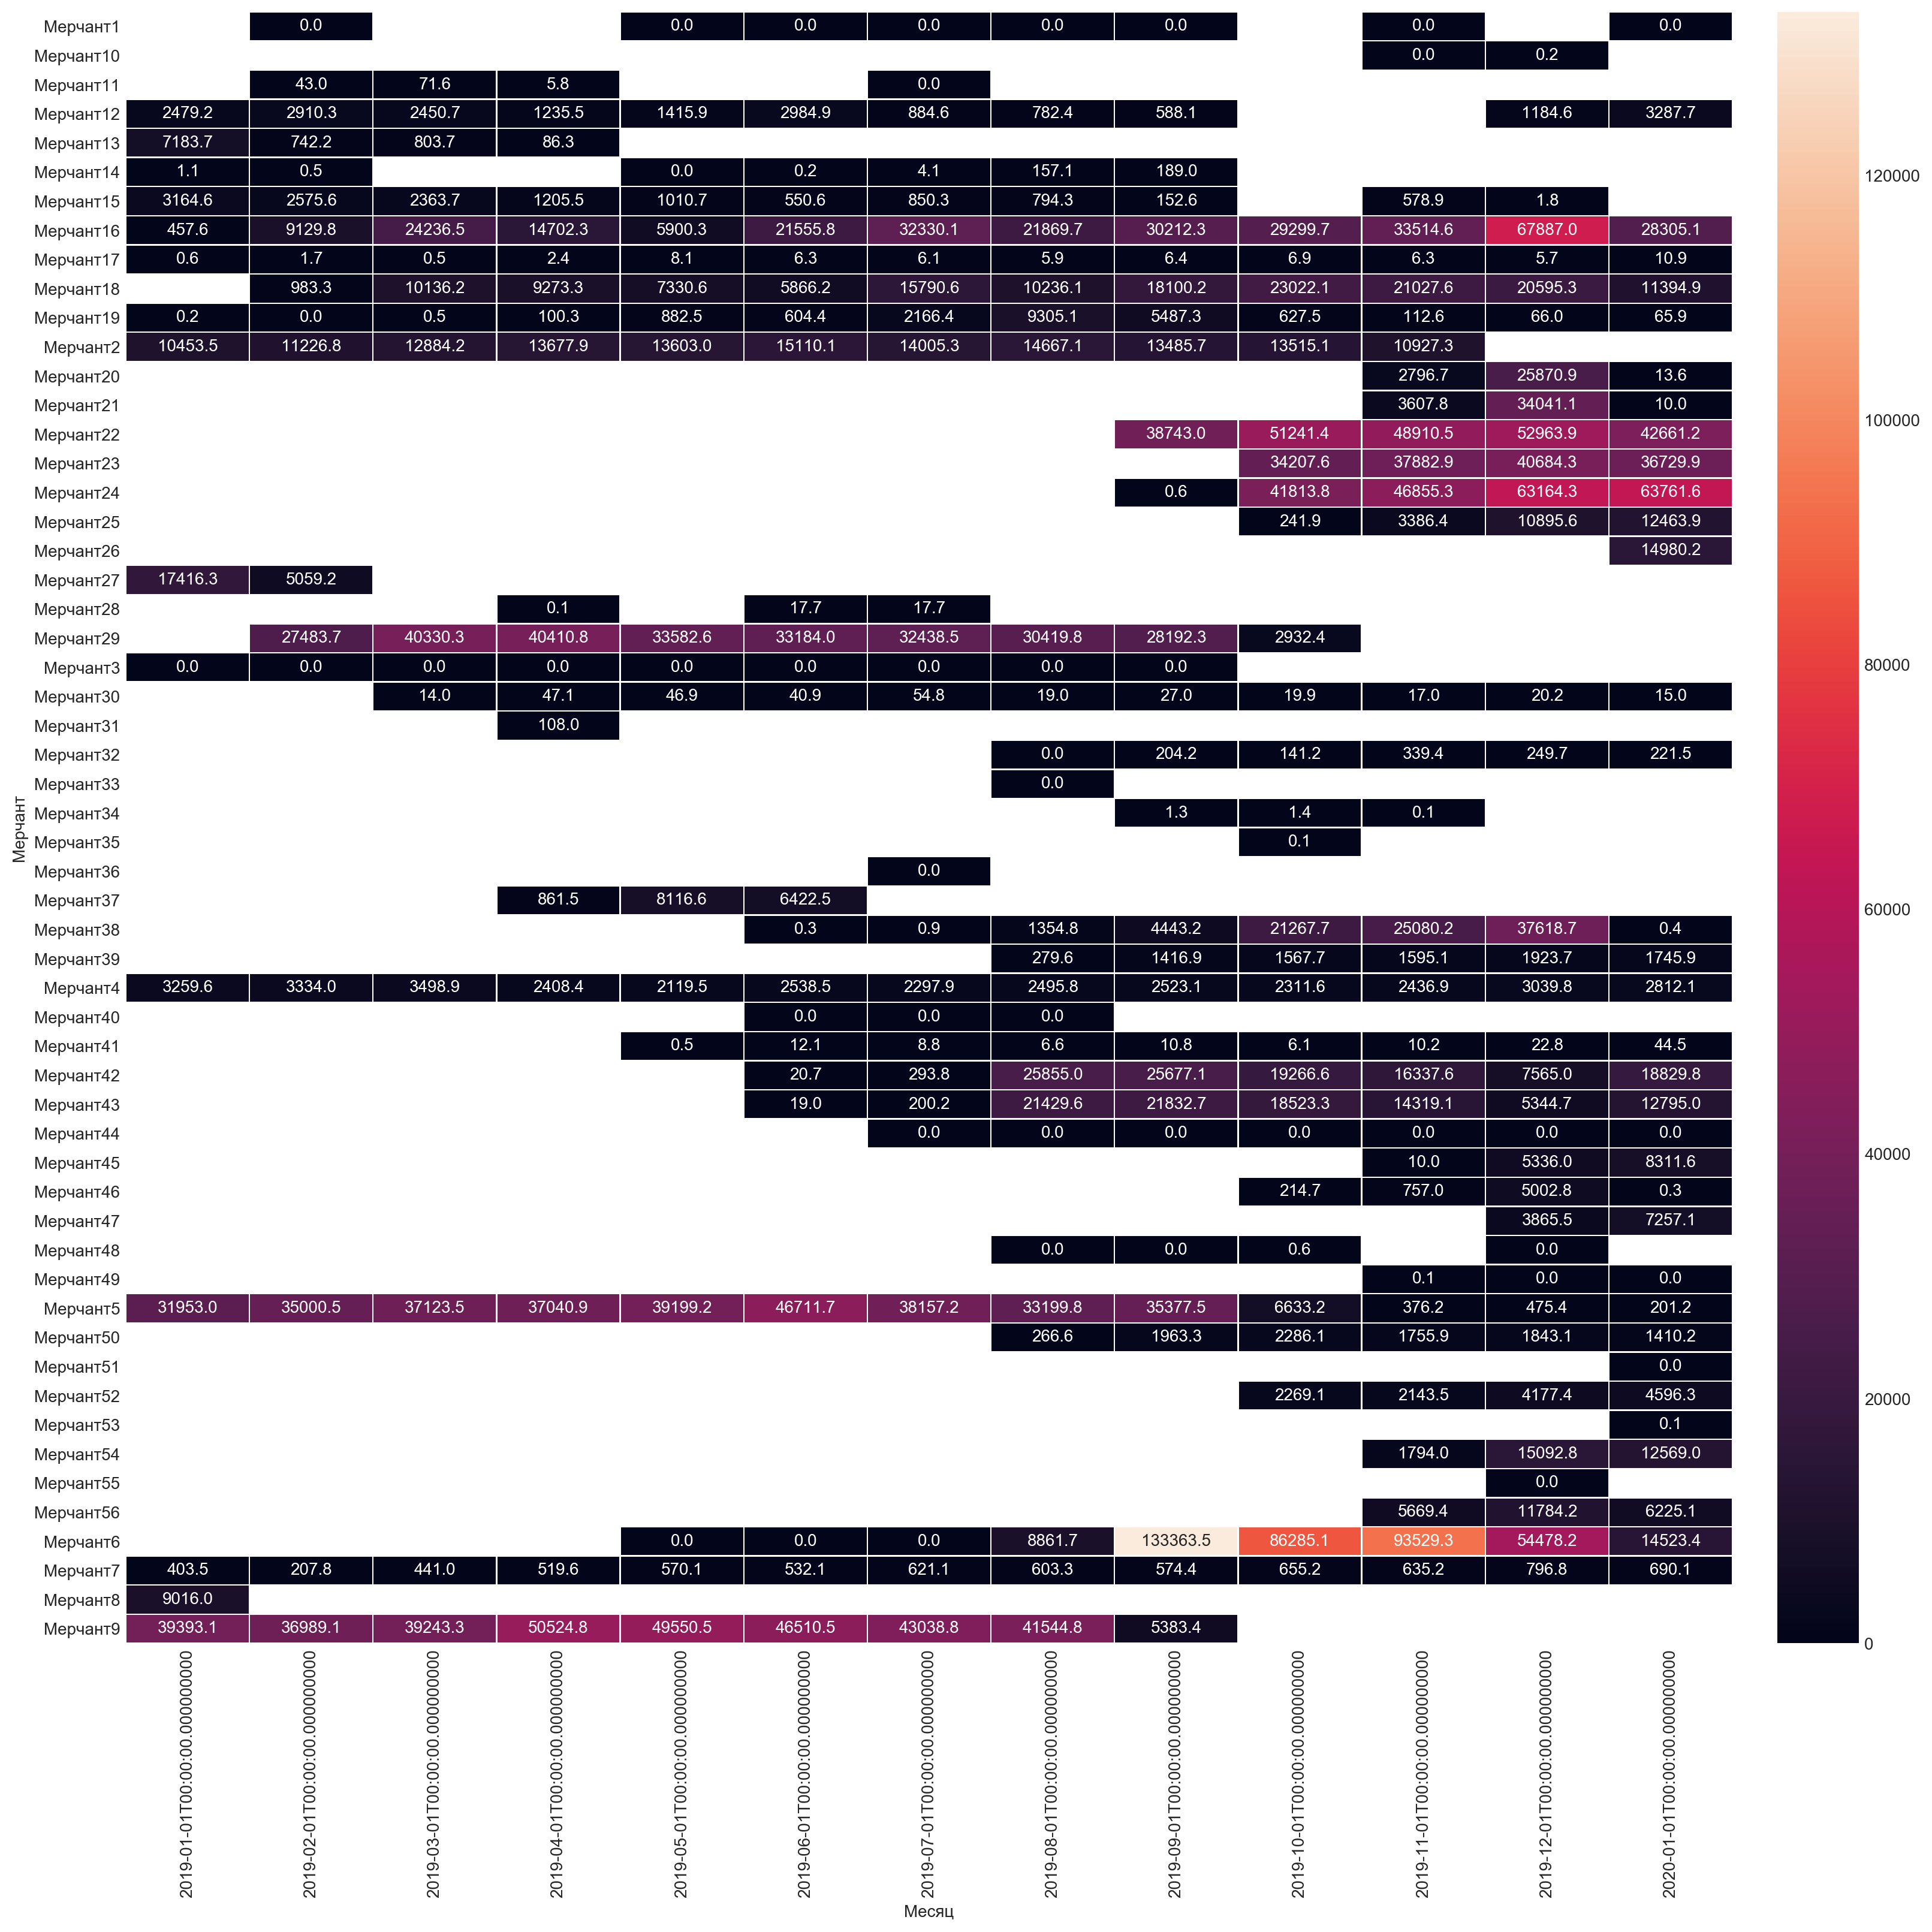

In [41]:
fg = plt.figure(figsize=(16, 16), constrained_layout=True)

platform_genre_sales = df.pivot_table(
                        index='Мерчант',
                        columns='Месяц',
                        values='Доход от мерчанта',
                        aggfunc=sum)
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidth=.5)

In [42]:
print('Оботор за 2019г. -- {} млн.'.format(toFixed(suc_income.sum() / 1e6, 2)))
print('Прогноз оборота на 2020г. с целью сохранения Net Revenue при снижении дохода на 0.05% -- {} млн.'\
      .format(toFixed(suc_income.sum() * 1.0005 / 1e6, 2)))

Оботор за 2019г. -- 179.70 млн.
Прогноз оборота на 2020г. с целью сохранения Net Revenue при снижении дохода на 0.05% -- 179.79 млн.


In [43]:
print('Net Revenue QIWI за 2019г. -- {} тыс.'.format(toFixed(suc_operations['Net Revenue'].sum() / 1e3, 1)))

Net Revenue QIWI за 2019г. -- 958.9 тыс.


In [44]:
print('Заработок в единицу оборота ∼ {}%'.format(toFixed(0.958 / 179.7 * 100, 2)))

Заработок в единицу оборота ∼ 0.53%
